#Aqui iniciara el proceso del proyecto.

Iniciaremos con la carga de librerias necesarias para realizar el trabajo:

In [1]:
import tabula
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import preprocessing

Se prosigue con la carga de CSV, ya que alguien en SMN se le ocurrio subir cada archivo con un nombre distinto y se cargaron con distintos links y para rematar, algunos PDF's fueron convertidos directo de JPG en vez de directamente desde CSV, como que dijo: si me estan chingando tambien chingare a quien necesite los datos, por todo lo anterior se hizo todo manual por que saber mucho no y complicacion demasiada.

In [7]:
#Precipitación

prep2015 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2015.csv")
prep2016 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2016.csv")
prep2017 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2017.csv")
prep2018 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2018.csv")
prep2019 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2019.csv")
prep2020 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2020.csv")
prep2021 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2021.csv")
prep2022 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2022.csv")

#Temperatura media

med2015 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/media2015.csv")
med2016 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/media2016.csv")
med2017 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/media2017.csv")
med2018 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/media2018.csv")
med2019 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/media2019.csv")
med2020 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/media2020.csv")
med2021 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/media2021.csv")
med2022 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/media2022.csv")

#Temperatura máxima
max2015 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/max2015.csv")
max2016 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/max2016.csv")
max2017 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/max2017.csv")
max2018 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/max2018.csv")
max2019 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/max2019.csv")
max2020 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/max2020.csv")
max2021 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/max2021.csv")
max2022 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/max2022.csv")

#Temperatura mínima

min2015 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/min2015.csv")
min2016 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/min2016.csv")
min2017 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/min2017.csv")
min2018 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/min2018.csv")
min2019 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/min2019.csv")
min2020 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/min2020.csv")
min2021 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/min2021.csv")
min2022 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/min2022.csv")

Lo siguiente es un preprocesamiento, para que todos los CSV esten homogeneizados antes de iniciar con su respectivo analisis. 

Se pasaran las columnas a mayusculas, se eliminaran columnas excedentes que no contengan información y se reemplazaran palabras que no se hayan escrito correctamente en la transformación de los archivos.

In [8]:
#Drop a columnas vacías de precipitación

prep2015 = prep2015.dropna(axis=1)
prep2016 = prep2016.dropna(axis=1)
prep2017 = prep2017.dropna(axis=1)
prep2018 = prep2018.dropna(axis=1)
prep2019 = prep2019.dropna(axis=1)
prep2020 = prep2020.dropna(axis=1)
prep2021 = prep2021.dropna(axis=1)
prep2022 = prep2022.dropna(axis=1)

#Drop a columnas vacías de temperatura media

med2015 = med2015.dropna(axis=1)
med2016 = med2016.dropna(axis=1)
med2017 = med2017.dropna(axis=1)
med2018 = med2018.dropna(axis=1)
med2019 = med2019.dropna(axis=1)
med2020 = med2020.dropna(axis=1)
med2021 = med2021.dropna(axis=1)
med2022 = med2022.dropna(axis=1)

#Drop a columnas vacías de temperatura minima

min2015 = min2015.dropna(axis=1)
min2016 = min2016.dropna(axis=1)
min2017 = min2017.dropna(axis=1)
min2018 = min2018.dropna(axis=1)
min2019 = min2019.dropna(axis=1)
min2020 = min2020.dropna(axis=1)
min2021 = min2021.dropna(axis=1)
min2022 = min2022.dropna(axis=1)

#Drop a columnas vacías de temperatura máxima

max2015 = max2015.dropna(axis=1)
max2016 = max2016.dropna(axis=1)
max2017 = max2017.dropna(axis=1)
max2018 = max2018.dropna(axis=1)
max2019 = max2019.dropna(axis=1)
max2020 = max2020.dropna(axis=1)
max2021 = max2021.dropna(axis=1)
max2022 = max2022.dropna(axis=1)


In [24]:
# Lista de DataFrames 
dataframes = [max2015, max2016, max2017, max2018, max2019, max2020, max2021, max2022]

# Iterar a través de los DataFrames y realizar ambas conversiones
for df in dataframes:
    # Convertir las columnas a mayúsculas
    df.columns = df.columns.str.upper()

    # Convertir todos los valores strings
    df = df.astype(str)

In [25]:
# Lista de DataFrames que quieres convertir a mayúsculas y cadenas
dataframes = [min2015, min2016, min2017, min2018, min2019, min2020, min2021, min2022]

# Iterar a través de los DataFrames y realizar ambas conversiones
for df in dataframes:
    # Convertir las columnas a mayúsculas si son de tipo cadena
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.upper()

    # Convertir todos los valores a cadenas (strings)
    df = df.astype(str)

In [26]:
# diccionario de reemplazos
reemplazos = {
    "CIUDAD DE MÃ©XICO": "CIUDAD DE MEXICO",
    "DISTRITO FEDERAL": "CIUDAD DE MEXICO",
    "ESTADO DE MÃ©XICO": "ESTADO DE MEXICO",
    "NUEVO LEÃ³N": "NUEVO LEON",
    "QUERÃ©TARO": "QUERETARO",
    "YUCATÃ¡N": "YUCATAN",
    "MICHOACÃ¡N": "MICHOACAN",
    "SAN LUIS POTOSÃ": "SAN LUIS POTOSI"
}

In [27]:
# Lista de DataFrames
dataframes = [prep2015, prep2016, prep2017, prep2018, prep2019, prep2020, prep2021, prep2022]

# Aplicar reemplazos a la columna "ENTIDAD" en cada DataFrame
for df in dataframes:
    df['ENTIDAD'] = df['ENTIDAD'].replace(reemplazos, regex=True)


In [28]:
# Lista de DataFrames
dataframes = [med2015, med2016, med2017, med2018, med2019, med2020, med2021, med2022]

# Aplicar reemplazos a la columna "ENTIDAD" en cada DataFrame
for df in dataframes:
    df['ENTIDAD'] = df['ENTIDAD'].replace(reemplazos, regex=True)

In [12]:
# Lista de DataFrames
dataframes = [min2015, min2016, min2017, min2018, min2019, min2020, min2021, min2022]

# Aplicar reemplazos a la columna "ENTIDAD" en cada DataFrame
for df in dataframes:
    df['ENTIDAD'] = df['ENTIDAD'].replace(reemplazos, regex=True)

In [29]:
# Lista de DataFrames
dataframes = [max2015, max2016, max2017, max2018, max2019, max2020, max2021, max2022]

# Aplicar reemplazos a la columna "ENTIDAD" en cada DataFrame
for df in dataframes:
    df['ENTIDAD'] = df['ENTIDAD'].replace(reemplazos, regex=True)

In [30]:
max2015.head()

ENTIDAD   ENE   FEB   MAR   ABR   MAY   JUN   JUL   AGO   SEP  \
0       AGUASCALIENTES  22.1  22.9  23.1  28.3  29.0  27.2  26.0  26.9  26.5   
1      BAJA CALIFORNIA  22.3  24.9  26.9  26.9  25.7  32.1  32.0  34.2  33.2   
2  BAJA CALIFORNIA SUR  25.3  27.8  29.2  30.1  30.2  34.2  34.8  36.4  34.7   
3             CAMPECHE  29.5  30.5  33.6  37.6  37.2  34.6  36.3  35.8  34.5   
4             COAHUILA  17.9  22.2  22.7  29.1  30.7  31.6  34.2  35.4  32.9   

    OCT   NOV   DIC  ANUAL  
0  25.6  25.3  22.2   25.4  
1  30.1  23.0  18.8   27.5  
2  32.3  29.1  24.8   30.7  
3  33.2  32.2  31.8   33.9  
4  29.6  24.6  22.6   27.8

In [31]:
min2015.head()

ENTIDAD   ENE   FEB   MAR   ABR   MAY   JUN   JUL   AGO   SEP  \
0       AGUASCALIENTES   5.7   6.0   7.5  11.8  11.8  14.3  13.0  12.6  12.7   
1      BAJA CALIFORNIA   9.7  10.5  12.8  13.5  13.9  18.0  19.5  21.2  20.7   
2  BAJA CALIFORNIA SUR  12.4  12.8  14.4  16.4  16.5  21.3  23.9  25.5  24.6   
3             CAMPECHE  17.6  17.6  20.7  23.1  23.3  23.3  23.1  23.3  23.2   
4             COAHUILA   5.1   6.3   9.5  15.8  17.1  18.9  19.9  20.2  18.4   

    OCT   NOV   DIC  ANUAL  
0  10.7   8.9   5.1   10.0  
1  17.5   9.3   4.9   14.3  
2  21.5  16.6  11.4   18.1  
3  23.2  22.8  21.4   21.9  
4  16.3  11.3   5.6   13.7

In [33]:
prep2015.head()

ENTIDAD   ENE   FEB   MAR   ABR   MAY    JUN    JUL    AGO  \
0       AGUASCALIENTES   7.1  32.7  90.8   8.4  31.7  202.8  148.0   93.2   
1      BAJA CALIFORNIA  21.7  14.6  37.4   6.3  22.1   17.9   20.2   18.6   
2  BAJA CALIFORNIA SUR  26.0  16.8  14.8   8.2   2.2   38.8   51.2   36.9   
3             CAMPECHE  90.1  32.1  82.7  26.0  71.1  157.8   78.7  203.5   
4             COAHUILA  26.4  28.7  71.5  34.1  80.1   74.2   49.0   32.6   

     SEP    OCT    NOV   DIC   ANUAL  
0   83.4  106.6    8.3  23.7   836.7  
1   41.6   18.3   20.0  24.2   262.9  
2  104.6   39.2   16.0   7.1   361.7  
3  184.2  197.6  123.6  78.8  1326.1  
4   36.7   70.4   15.1   6.3   525.0

In [34]:
med2015.head()

ENTIDAD   ENE   FEB   MAR   ABR   MAY   JUN   JUL   AGO   SEP  \
0       AGUASCALIENTES  13.9  14.5  15.3  20.0  20.4  20.7  19.5  19.7  19.6   
1      BAJA CALIFORNIA  16.0  17.7  19.8  20.2  19.8  25.1  25.8  27.7  27.0   
2  BAJA CALIFORNIA SUR  18.9  20.3  21.8  23.2  23.4  27.7  29.3  31.0  29.7   
3             CAMPECHE  23.5  24.0  27.1  30.3  30.3  29.0  29.7  29.6  28.9   
4             COAHUILA  11.5  14.3  16.1  22.5  23.9  25.3  27.0  27.8  25.6   

    OCT   NOV   DIC  ANUAL  
0  18.1  17.1  13.6   17.7  
1  23.8  16.1  11.8   20.9  
2  26.9  22.9  18.1   24.4  
3  28.2  27.5  26.6   27.9  
4  23.0  18.0  14.1   20.8

Se inicia con el proceso de combinar los Dataframes para solo tener uno y asi realizar las graficas correspondientes. Tambien se convertiran todas las columnas en mayusculas.

In [35]:
# Lista de DataFrames que deseas concatenar
dataframes = [prep2015, prep2016, prep2017, prep2018, prep2019, prep2020, prep2021, prep2022]

# Agrega un suffix a cada DataFrame antes de concatenar
keys = ['_15', '_16', '_17', '_18', '_19', '_20', '_21', '_22']
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].add_suffix(keys[i])

# Concatena los DataFrames en la lista usando pd.concat
med_merge = pd.concat(dataframes, axis=1)

# resultado final en DataFrame 'med_merge'
precip = med_merge

In [36]:
# lista de DataFrames a concatenar
dataframes = [med2015, med2016, med2017, med2018, med2019, med2020, med2021, med2022]

# suffix de cada DataFrame antes de concatenar
keys = ['_15', '_16', '_17', '_18', '_19', '_20', '_21', '_22']
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].add_suffix(keys[i])

# Concatena los DataFrames en la lista usando pd.concat
med_merge = pd.concat(dataframes, axis=1)

tempmed = med_merge

In [37]:
# Crea una lista de DataFrames que deseas concatenar
dataframes = [min2015, min2016, min2017, min2018, min2019, min2020, min2021, min2022]

# Agrega una clave a cada DataFrame antes de concatenar
keys = ['_15', '_16', '_17', '_18', '_19', '_20', '_21', '_22']
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].add_suffix(keys[i])

# Concatena los DataFrames en la lista usando pd.concat
med_merge = pd.concat(dataframes, axis=1)

# Ahora tienes el resultado final en el DataFrame 'med_merge'
tempmin = med_merge

In [38]:
# Crea una lista de DataFrames que deseas concatenar
dataframes = [max2015, max2016, max2017, max2018, max2019, max2020, max2021, max2022]

# Agrega una clave a cada DataFrame antes de concatenar
keys = ['_15', '_16', '_17', '_18', '_19', '_20', '_21', '_22']
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].add_suffix(keys[i])

# Concatena los DataFrames en la lista usando pd.concat
med_merge = pd.concat(dataframes, axis=1)

# Ahora tienes el resultado final en el DataFrame 'med_merge'
tempmax = med_merge

In [39]:
precip.columns = precip.columns.str.upper()
tempmed.columns = tempmed.columns.str.upper()


In [44]:
# Hacer el shape de forma bonita
shape_precip = precip.shape
shape_tempmed = tempmed.shape
shape_tempmin = tempmin.shape
shape_tempmax = tempmax.shape

# Imprimir el shape 
print("Shape de precip:", shape_precip)
print("Shape de tempmed:", shape_tempmed)
print("Shape de tempmin:", shape_tempmin)
print("Shape de tempmax:", shape_tempmax)

Shape de precip: (33, 112)
Shape de tempmed: (33, 112)
Shape de tempmin: (33, 112)
Shape de tempmax: (33, 112)


Se creara una lista para extraer las columnas anuales de cada uno de los dataframes, esto para crear graficas que demuestren tendencias anuales en un solo grafico.

In [40]:
anuales_precip = precip[["ENTIDAD_15", "ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]]
print(anuales_precip)

             ENTIDAD_15  ANUAL_15  ANUAL_16  ANUAL_17  ANUAL_18  ANUAL_19  \
0        AGUASCALIENTES     836.7     574.9     579.4     768.7     453.1   
1       BAJA CALIFORNIA     262.9     219.0     131.8     125.3     206.1   
2   BAJA CALIFORNIA SUR     361.7     200.0     174.8     163.2     270.6   
3              CAMPECHE    1326.1    1177.0    1407.3    1389.8    1303.2   
4              COAHUILA     525.0     554.8     358.6     396.8     261.5   
5                COLIMA    1956.7    1333.2    1728.9    1611.7    1816.7   
6               CHIAPAS    1741.1    1614.2    1994.0    1705.3    1767.4   
7             CHIHUAHUA     630.5     512.5     453.8     490.8     470.3   
8      CIUDAD DE MEXICO     491.8     655.9     488.0     786.2     565.3   
9               DURANGO     627.1     509.8     454.6     520.5     428.8   
10           GUANAJUATO     840.8     691.3     611.5     850.3     553.7   
11             GUERRERO    1003.3     985.5    1161.1    1159.0    1102.1   

In [41]:
anuales_med = tempmed[["ENTIDAD_15", "ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]]
print(anuales_med)

             ENTIDAD_15  ANUAL_15  ANUAL_16  ANUAL_17  ANUAL_18  ANUAL_19  \
0        AGUASCALIENTES      17.7      18.4      18.3      18.2      18.8   
1       BAJA CALIFORNIA      20.9      21.6      21.7      21.0      19.9   
2   BAJA CALIFORNIA SUR      24.4      24.3      24.5      24.3      23.7   
3              CAMPECHE      27.9      28.1      27.8      27.1      27.7   
4              COAHUILA      20.8      22.1      22.5      21.8      22.4   
5                COLIMA      26.7      27.3      26.9      27.2      27.4   
6               CHIAPAS      24.9      25.5      25.3      25.1      25.6   
7             CHIHUAHUA      18.6      19.1      19.4      19.2      18.9   
8      CIUDAD DE MEXICO      17.8      17.9      18.0      17.8      18.8   
9               DURANGO      17.9      18.7      19.0      19.0      18.9   
10           GUANAJUATO      19.1      19.2      19.3      19.1      19.8   
11             GUERRERO      26.2      25.8      25.2      25.2      25.5   

In [42]:
anuales_min = tempmin[["ENTIDAD_15", "ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]]
print(anuales_min)

             ENTIDAD_15  ANUAL_15  ANUAL_16  ANUAL_17  ANUAL_18  ANUAL_19  \
0        AGUASCALIENTES      10.0      10.1       9.5       9.9      10.3   
1       BAJA CALIFORNIA      14.3      14.6      14.8      13.8      13.3   
2   BAJA CALIFORNIA SUR      18.1      17.7      17.9      17.8      17.4   
3              CAMPECHE      21.9      22.2      21.9      21.2      21.7   
4              COAHUILA      13.7      15.1      15.1      15.0      15.2   
5                COLIMA      20.8      20.9      20.6      20.7      21.0   
6               CHIAPAS      19.2      19.4      19.2      19.0      19.3   
7             CHIHUAHUA      10.5      10.6      10.6      10.7      10.3   
8      CIUDAD DE MEXICO      11.7      11.6      11.4      11.3      12.1   
9               DURANGO       9.6       9.7      10.0      10.0       9.7   
10           GUANAJUATO      11.3      10.9      10.7      10.9      11.3   
11             GUERRERO      19.9      19.0      18.2      18.3      18.6   

In [43]:
anuales_max = tempmax[["ENTIDAD_15", "ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]]
print(anuales_max)

             ENTIDAD_15  ANUAL_15 ANUAL_16  ANUAL_17  ANUAL_18  ANUAL_19  \
0        AGUASCALIENTES      25.4     26.7      27.1      26.5      27.4   
1       BAJA CALIFORNIA      27.5     28.6      28.5      28.1      26.4   
2   BAJA CALIFORNIA SUR      30.7       31      31.1      30.6      29.9   
3              CAMPECHE      33.9     33.9      33.7      33.1      33.7   
4              COAHUILA      27.8     29.2      29.9      28.7      29.5   
5                COLIMA      32.6     33.7      33.2      33.6      33.8   
6               CHIAPAS      30.7     31.6      31.3      31.3      31.9   
7             CHIHUAHUA      26.6       TU      28.2      27.7      27.6   
8      CIUDAD DE MEXICO      23.9     24.1      24.6      24.3      25.4   
9               DURANGO      26.2     27.6      28.1      28.0      28.2   
10           GUANAJUATO      27.0     27.4      27.9      27.2      28.3   
11             GUERRERO      32.4     32.5      32.2      32.1      32.4   
12          

Ya que extrajimos los datos anuales de los dataframe, procedemos a darle drop de los df principales para no causar ruido en las graficas.

In [45]:
# Lista de lo que le quiero dar drop
ENTIDAD = ['ENTIDAD_16', 'ENTIDAD_17', 'ENTIDAD_18', 'ENTIDAD_19', 'ENTIDAD_20', 'ENTIDAD_21', 'ENTIDAD_22']
ANUAL = ["ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]


In [46]:
# A darle drop hsdpm
precip = precip.drop(ENTIDAD + ANUAL, axis=1)
tempmed = tempmed.drop(ENTIDAD + ANUAL, axis=1)
tempmin = tempmin.drop(ENTIDAD + ANUAL, axis=1)
tempmax = tempmax.drop(ENTIDAD + ANUAL, axis=1)

In [47]:
# Hacer el shape de forma bonita
shape_precip = precip.shape
shape_tempmed = tempmed.shape
shape_tempmin = tempmin.shape
shape_tempmax = tempmax.shape

# Imprimir el shape 
print("Shape de precip:", shape_precip)
print("Shape de tempmed:", shape_tempmed)
print("Shape de tempmin:", shape_tempmin)
print("Shape de tempmax:", shape_tempmax)

Shape de precip: (33, 98)
Shape de tempmed: (33, 98)
Shape de tempmin: (33, 98)
Shape de tempmax: (33, 98)


Se comienza con un analisis de los datos que estan en los dataframes.

In [48]:
precip.head()

ENTIDAD_15  ENE_15  FEB_15  MAR_15  ABR_15  MAY_15  JUN_15  \
0       AGUASCALIENTES     7.1    32.7    90.8     8.4    31.7   202.8   
1      BAJA CALIFORNIA    21.7    14.6    37.4     6.3    22.1    17.9   
2  BAJA CALIFORNIA SUR    26.0    16.8    14.8     8.2     2.2    38.8   
3             CAMPECHE    90.1    32.1    82.7    26.0    71.1   157.8   
4             COAHUILA    26.4    28.7    71.5    34.1    80.1    74.2   

   JUL_15  AGO_15  SEP_15  ...  MAR_22  ABR_22  MAY_22  JUN_22  JUL_22  \
0   148.0    93.2    83.4  ...     0.0    15.3     6.5    39.2    92.6   
1    20.2    18.6    41.6  ...    13.8     0.7     0.0     0.0     2.9   
2    51.2    36.9   104.6  ...     0.1     0.0     0.0     4.7    22.2   
3    78.7   203.5   184.2  ...    52.3    79.2   141.3   180.9   138.1   
4    49.0    32.6    36.7  ...     0.1    14.2    22.0     8.8    14.4   

   AGO_22  SEP_22  OCT_22  NOV_22  DIC_22  
0   123.6    53.5    48.0     6.0     0.2  
1    15.3    54.9     4.0     6.6    15.4  
2    57.4   272.0     1.4     0.5     1.5  
3   199.3   187.8   127.2   129.9    65.1  
4   114.0    50.0    26.0     6.7     1.3  

[5 rows x 98 columns]

In [49]:
precip.describe()

ENE_15      FEB_15      MAR_15     ABR_15      MAY_15      JUN_15  \
count   33.000000   33.000000   33.000000  33.000000   33.000000   33.000000   
mean    35.742424   29.193939   81.736364  26.624242   67.860606  137.845455   
std     52.690850   26.075311   54.285609  24.097718   47.659967   58.098123   
min      0.300000    2.900000   14.800000   0.700000    2.200000   17.900000   
25%      7.100000   14.600000   43.200000   8.400000   25.400000   89.700000   
50%     24.900000   21.200000   74.600000  17.700000   69.600000  137.500000   
75%     38.200000   33.300000   93.900000  34.100000  108.500000  167.500000   
max    294.200000  129.100000  306.100000  86.200000  155.600000  270.500000   

           JUL_15      AGO_15      SEP_15      OCT_15  ...     MAR_22  \
count   33.000000   33.000000   33.000000   33.000000  ...  33.000000   
mean   114.278788  121.251515  157.700000  135.154545  ...   9.542424   
std     51.773200   64.088699   82.705226  121.483006  ...  17.149527   
min     20.200000   18.600000   36.700000   18.300000  ...   0.000000   
25%     73.700000   76.800000   96.300000   60.500000  ...   0.200000   
50%    110.300000  107.700000  132.700000  106.600000  ...   1.000000   
75%    148.000000  156.600000  201.300000  164.600000  ...   7.100000   
max    207.200000  257.900000  360.200000  601.900000  ...  65.600000   

          ABR_22      MAY_22      JUN_22      JUL_22      AGO_22      SEP_22  \
count  33.000000   33.000000   33.000000   33.000000   33.000000   33.000000   
mean   26.487879   34.321212  123.054545  124.466667  170.218182  177.233333   
std    25.904763   43.703824   87.604595   80.840606   86.088056  115.789042   
min     0.000000    0.000000    0.000000    2.900000   15.300000   50.000000   
25%     3.600000    4.300000   53.500000   80.100000  114.400000   78.600000   
50%    20.000000   19.100000   95.500000  112.300000  172.400000  140.800000   
75%    38.300000   39.000000  179.000000  178.200000  208.800000  230.000000   
max    84.400000  158.400000  305.300000  315.400000  339.300000  462.100000   

           OCT_22      NOV_22      DIC_22  
count   33.000000   33.000000   33.000000  
mean    80.887879   37.584848   21.096970  
std     72.861494   60.672729   37.678347  
min      1.400000    0.000000    0.000000  
25%     37.300000    4.300000    1.400000  
50%     57.500000    9.800000    6.600000  
75%    101.400000   32.000000   15.400000  
max    316.500000  283.800000  181.300000  

[8 rows x 97 columns]

In [50]:
tempmin.head()

ENTIDAD_15  ENE_15  FEB_15  MAR_15  ABR_15  MAY_15  JUN_15  \
0       AGUASCALIENTES     5.7     6.0     7.5    11.8    11.8    14.3   
1      BAJA CALIFORNIA     9.7    10.5    12.8    13.5    13.9    18.0   
2  BAJA CALIFORNIA SUR    12.4    12.8    14.4    16.4    16.5    21.3   
3             CAMPECHE    17.6    17.6    20.7    23.1    23.3    23.3   
4             COAHUILA     5.1     6.3     9.5    15.8    17.1    18.9   

   JUL_15  AGO_15  SEP_15  ...  MAR_22  ABR_22  MAY_22  JUN_22  JUL_22  \
0    13.0    12.6    12.7  ...     6.1     9.1    12.9    14.3    13.7   
1    19.5    21.2    20.7  ...     9.5    11.9    14.2    18.7    21.1   
2    23.9    25.5    24.6  ...    12.3    14.6    16.8    20.7    23.2   
3    23.1    23.3    23.2  ...    20.3    22.4    23.4    23.2    23.3   
4    19.9    20.2    18.4  ...     9.9    16.6    20.2    22.3    23.1   

   AGO_22  SEP_22  OCT_22  NOV_22  DIC_22  
0    13.5    11.8     8.8     6.3     3.8  
1    22.4    21.3    16.5     9.0     7.3  
2    24.0    23.0    19.3    14.9    12.7  
3    23.2    23.1    22.0    21.7    19.9  
4    22.2    19.2    14.4    10.2     7.7  

[5 rows x 98 columns]

In [51]:
tempmin.describe()

ENE_15     FEB_15     MAR_15     ABR_15     MAY_15     JUN_15  \
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   
mean   10.242424  10.875758  13.033333  16.333333  16.818182  18.506061   
std     5.103187   4.634317   4.625923   4.480978   4.358286   4.211958   
min     2.500000   4.200000   6.100000   8.000000   8.900000   9.900000   
25%     6.100000   6.700000   9.500000  13.200000  13.200000  14.900000   
50%     9.200000  10.500000  12.400000  16.400000  16.600000  18.900000   
75%    14.400000  14.500000  16.100000  19.800000  20.500000  22.000000   
max    18.800000  18.500000  22.100000  24.300000  24.200000  24.300000   

          JUL_15     AGO_15     SEP_15     OCT_15  ...     MAR_22     ABR_22  \
count  33.000000  33.000000  33.000000  33.000000  ...  33.000000  33.000000   
mean   18.400000  18.533333  18.403030  16.796970  ...  11.645455  15.154545   
std     4.557686   4.770853   4.502394   4.692979  ...   4.905997   4.402350   
min     9.300000   9.300000   9.900000   8.200000  ...   4.000000   7.800000   
25%    15.000000  14.600000  13.900000  12.400000  ...   9.200000  11.900000   
50%    19.500000  19.900000  19.100000  17.400000  ...  10.500000  14.800000   
75%    22.400000  22.800000  22.700000  20.700000  ...  14.800000  18.400000   
max    24.600000  25.500000  24.600000  23.500000  ...  21.500000  23.200000   

          MAY_22     JUN_22     JUL_22     AGO_22     SEP_22     OCT_22  \
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   
mean   17.187879  18.433333  18.830303  18.675758  17.984848  15.560606   
std     4.272350   4.178940   4.530831   4.493887   4.398304   4.647509   
min     8.100000   8.900000   8.600000   9.000000   9.700000   8.500000   
25%    14.000000  15.100000  14.700000  14.400000  14.200000  12.100000   
50%    17.200000  19.400000  19.800000  19.800000  18.600000  15.100000   
75%    20.300000  22.300000  23.100000  22.600000  22.300000  19.300000   
max    24.500000  23.900000  24.500000  24.500000  24.200000  23.100000   

          NOV_22     DIC_22  
count  33.000000  33.000000  
mean   13.009091  10.654545  
std     5.430893   5.447482  
min     3.600000   2.600000  
25%     9.200000   7.300000  
50%    11.800000   9.200000  
75%    16.600000  14.000000  
max    22.700000  21.000000  

[8 rows x 97 columns]

In [52]:
tempmed.head()

ENTIDAD_15  ENE_15  FEB_15  MAR_15  ABR_15  MAY_15  JUN_15  \
0       AGUASCALIENTES    13.9    14.5    15.3    20.0    20.4    20.7   
1      BAJA CALIFORNIA    16.0    17.7    19.8    20.2    19.8    25.1   
2  BAJA CALIFORNIA SUR    18.9    20.3    21.8    23.2    23.4    27.7   
3             CAMPECHE    23.5    24.0    27.1    30.3    30.3    29.0   
4             COAHUILA    11.5    14.3    16.1    22.5    23.9    25.3   

   JUL_15  AGO_15  SEP_15  ...  MAR_22  ABR_22  MAY_22  JUN_22  JUL_22  \
0    19.5    19.7    19.6  ...    16.9    19.8    22.5    21.7    21.0   
1    25.8    27.7    27.0  ...    16.5    19.2    21.3    25.4    27.1   
2    29.3    31.0    29.7  ...    20.0    21.8    23.7    26.7    29.0   
3    29.7    29.6    28.9  ...    26.9    29.3    30.0    28.5    28.7   
4    27.0    27.8    25.6  ...    19.2    24.7    28.2    29.5    30.1   

   AGO_22  SEP_22  OCT_22  NOV_22  DIC_22  
0    20.3    18.3    17.2    15.9    13.8  
1    28.0    26.8    22.8    15.2    13.3  
2    29.2    28.0    25.2    21.0    19.1  
3    28.8    27.9    27.1    26.7    25.1  
4    28.5    25.0    21.2    17.0    14.9  

[5 rows x 98 columns]

In [53]:
tempmed.describe()

ENE_15     FEB_15     MAR_15     ABR_15     MAY_15     JUN_15  \
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   
mean   17.315152  18.421212  20.024242  23.675758  23.872727  24.648485   
std     4.463961   3.786634   4.111419   3.714165   3.723513   3.912889   
min     9.900000  12.500000  13.800000  17.100000  15.900000  16.100000   
25%    13.900000  15.300000  16.900000  20.200000  20.800000  21.900000   
50%    16.200000  17.800000  19.700000  23.300000  23.900000  25.100000   
75%    21.300000  22.000000  23.400000  26.600000  26.800000  28.100000   
max    24.900000  24.300000  27.100000  30.300000  30.300000  30.700000   

          JUL_15    AGO_15     SEP_15     OCT_15  ...     MAR_22     ABR_22  \
count  33.000000  33.00000  33.000000  33.000000  ...  33.000000  33.000000   
mean   24.648485  25.10303  24.409091  23.048485  ...  20.518182  23.484848   
std     4.268352   4.31498   4.101476   3.933122  ...   3.540785   3.317861   
min    15.500000  15.90000  15.700000  14.900000  ...  15.000000  16.700000   
25%    21.300000  21.80000  21.600000  19.800000  ...  18.300000  20.700000   
50%    25.700000  26.10000  25.400000  23.800000  ...  19.900000  23.400000   
75%    28.700000  28.90000  28.300000  26.300000  ...  23.000000  25.500000   
max    30.200000  31.00000  29.700000  28.500000  ...  26.900000  29.300000   

          MAY_22     JUN_22     JUL_22     AGO_22     SEP_22     OCT_22  \
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   
mean   25.296970  25.045455  25.281818  24.842424  23.615152  22.172727   
std     3.235978   3.733136   4.017575   4.027719   3.991406   3.715279   
min    17.800000  16.400000  16.600000  16.100000  15.900000  15.400000   
25%    23.200000  22.500000  21.700000  21.400000  20.100000  18.800000   
50%    25.700000  25.400000  26.000000  25.300000  24.200000  22.200000   
75%    27.800000  28.400000  28.700000  28.500000  27.700000  25.200000   
max    30.500000  30.200000  30.900000  30.600000  29.200000  27.600000   

          NOV_22     DIC_22  
count  33.000000  33.000000  
mean   20.227273  18.190909  
std     4.102535   4.231752  
min    13.200000  12.000000  
25%    17.000000  15.200000  
50%    20.300000  17.500000  
75%    23.000000  20.600000  
max    27.000000  25.800000  

[8 rows x 97 columns]

In [54]:
tempmax.head()  

ENTIDAD_15  ENE_15  FEB_15  MAR_15  ABR_15  MAY_15  JUN_15  \
0       AGUASCALIENTES    22.1    22.9    23.1    28.3    29.0    27.2   
1      BAJA CALIFORNIA    22.3    24.9    26.9    26.9    25.7    32.1   
2  BAJA CALIFORNIA SUR    25.3    27.8    29.2    30.1    30.2    34.2   
3             CAMPECHE    29.5    30.5    33.6    37.6    37.2    34.6   
4             COAHUILA    17.9    22.2    22.7    29.1    30.7    31.6   

   JUL_15  AGO_15  SEP_15  ...  MAR_22  ABR_22  MAY_22  JUN_22  JUL_22  \
0    26.0    26.9    26.5  ...    27.6    30.4    32.0    29.2    28.4   
1    32.0    34.2    33.2  ...    23.6    26.4    28.5    32.2    33.2   
2    34.8    36.4    34.7  ...    27.7    28.9    30.7    32.8    34.8   
3    36.3    35.8    34.5  ...    33.4    36.1    36.7    33.8    34.2   
4    34.2    35.4    32.9  ...    28.5    32.9    36.3    36.8    37.1   

   AGO_22  SEP_22  OCT_22  NOV_22  DIC_22  
0    27.1    24.9    25.6    25.5    23.7  
1    33.6    32.3    29.0    21.4    19.3  
2    34.4    32.9    31.1    27.1    25.6  
3    34.3    32.8    32.2    31.7    30.3  
4    34.7    30.7    27.9    23.8    22.0  

[5 rows x 98 columns]

In [55]:
tempmax.describe()

ENE_15     FEB_15     MAR_15    ABR_15     MAY_15     JUN_15  \
count  33.000000  33.000000  33.000000  33.00000  33.000000  33.000000   
mean   24.393939  25.969697  27.012121  31.00303  30.906061  30.778788   
std     4.044436   3.109209   3.774980   3.18566   3.364608   3.774897   
min    17.300000  20.900000  21.200000  25.60000  22.900000  22.100000   
25%    21.100000  22.900000  23.200000  28.30000  29.600000  28.300000   
50%    23.400000  25.000000  26.500000  31.00000  31.200000  31.600000   
75%    28.100000  29.000000  30.600000  33.60000  32.800000  33.100000   
max    31.700000  31.000000  34.000000  37.60000  37.200000  38.100000   

          JUL_15     AGO_15     SEP_15     OCT_15  ...     MAR_22     ABR_22  \
count  33.000000  33.000000  33.000000  33.000000  ...  33.000000  33.000000   
mean   30.896970  31.672727  30.409091  29.296970  ...  29.396970  31.800000   
std     4.042469   3.971010   3.802578   3.287142  ...   2.632428   2.684679   
min    21.700000  22.300000  21.500000  21.500000  ...  23.600000  25.400000   
25%    27.700000  28.700000  28.000000  27.000000  ...  27.700000  31.100000   
50%    31.800000  32.800000  31.600000  29.800000  ...  29.000000  32.500000   
75%    34.300000  34.900000  33.300000  32.100000  ...  31.900000  33.700000   
max    36.700000  37.400000  35.200000  34.200000  ...  33.400000  36.100000   

          MAY_22     JUN_22     JUL_22     AGO_22     SEP_22     OCT_22  \
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   
mean   33.421212  31.663636  31.763636  31.006061  29.239394  28.772727   
std     2.640876   3.563164   3.670815   3.650166   3.685778   2.976604   
min    26.800000  23.200000  23.200000  22.300000  21.700000  22.400000   
25%    33.000000  29.800000  29.200000  28.300000  25.900000  26.700000   
50%    33.600000  32.200000  32.300000  31.000000  29.400000  29.000000   
75%    35.500000  34.000000  34.200000  34.300000  32.500000  31.500000   
max    36.700000  38.200000  37.800000  36.700000  35.500000  34.400000   

          NOV_22     DIC_22  
count  33.000000  33.000000  
mean   27.457576  25.721212  
std     3.105442   3.377847  
min    21.400000  19.300000  
25%    25.400000  23.300000  
50%    26.900000  25.200000  
75%    29.700000  27.900000  
max    32.700000  32.200000  

[8 rows x 97 columns]

La siguiente seccion es para la detección de outliers utilizando los datos anuales de los dataframes, en este caso, como son datos metereologicos decidi quedarme con los outliers debido a que son patrones climatologicos que pueden estar asociados al ENSO (Ciclo de "El Niño" y "La Niña")

In [63]:
# Selecciona las columnas de interés que contienen datos anuales
columnas_anuales = ["ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]

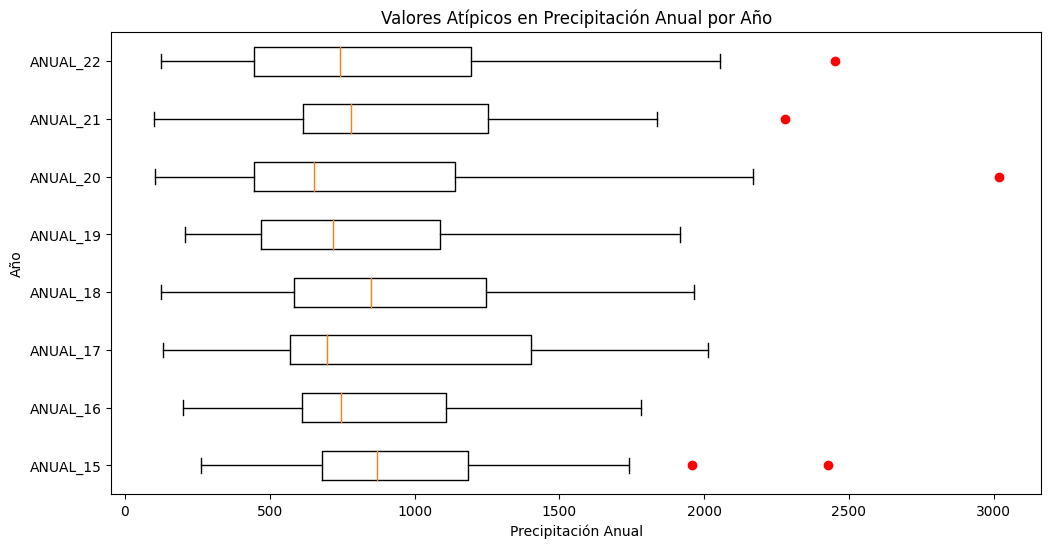

In [64]:
# Crea un DataFrame con las columnas seleccionadas
datos_anuales_precip = anuales_precip[columnas_anuales]

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crea un gráfico de caja para visualizar los valores atípicos
plt.boxplot(datos_anuales_precip.values, labels=columnas_anuales, vert=False, sym='ro')
plt.title("Valores Atípicos en Precipitación Anual por Año")
plt.xlabel("Precipitación Anual")
plt.ylabel("Año")

# Muestra el gráfico
plt.show()

In [65]:
# Crea un DataFrame con las columnas seleccionadas
datos_anuales_med = anuales_med[columnas_anuales]

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crea un gráfico de caja para visualizar los valores atípicos
plt.boxplot(datos_anuales_med.values, labels=columnas_anuales, vert=False, sym='ro')
plt.title("Valores Atípicos en temperatura promedio Anual por Año")
plt.xlabel("Precipitación Anual")
plt.ylabel("Año")

# Muestra el gráfico
plt.show()

In [66]:
# Crea un DataFrame con las columnas seleccionadas
datos_anuales_min = anuales_min[columnas_anuales]

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crea un gráfico de caja para visualizar los valores atípicos
plt.boxplot(datos_anuales_min.values, labels=columnas_anuales, vert=False, sym='ro')
plt.title("Valores Atípicos en temperatura minima Anual por Año")
plt.xlabel("Precipitación Anual")
plt.ylabel("Año")

# Muestra el gráfico
plt.show()

In [ ]:
# Crea un DataFrame con las columnas seleccionadas
datos_anuales_max = anuales_max[columnas_anuales]

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crea un gráfico de caja para visualizar los valores atípicos
plt.boxplot(datos_anuales_max.values, labels=columnas_anuales, vert=False, sym='ro')
plt.title("Valores Atípicos en temperatura maxima Anual por Año")
plt.xlabel("Precipitación Anual")
plt.ylabel("Año")

# Muestra el gráfico
plt.show()

In [69]:

# Crea un DataFrame con las columnas seleccionadas
da_precip = anuales_precip[columnas_anuales]

# Calcula el rango intercuartil (IQR) para cada columna
Q1 = da_precip.quantile(0.25)
Q3 = da_precip.quantile(0.75)
IQR = Q3 - Q1

# Calcula los límites inferior y superior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encuentra y marca los valores atípicos
outliers = ((da_precip < lower_bound) | (da_precip > upper_bound))

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Define el eje y personalizado con los nombres de los estados
y_labels = anuales_precip['ENTIDAD_15']

# Crea un gráfico de dispersión para visualizar los valores atípicos
for columna in columnas_anuales:
    plt.scatter(da_precip[columna], y_labels, c=outliers[columna], cmap='RdYlGn', marker='o')
plt.colorbar(label="Outlier")
plt.title("Detección de Outliers en Precipitación Anual por Año")
plt.xlabel("Precipitación Anual")
plt.ylabel("Estado")

# Muestra el gráfico
plt.show()

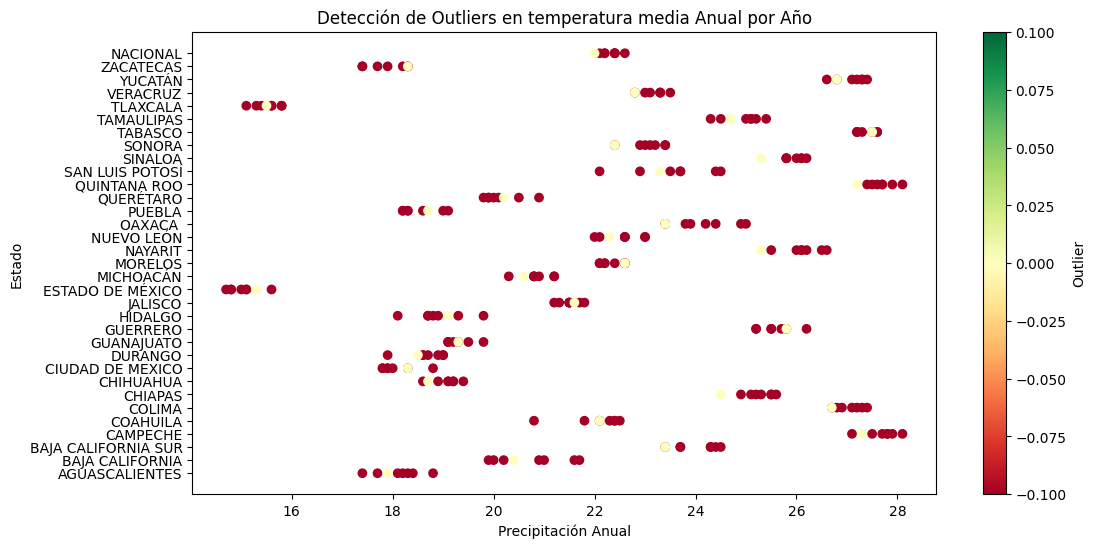

In [70]:
# Crea un DataFrame con las columnas seleccionadas
dat_med = anuales_med[columnas_anuales]

# Calcula el rango intercuartil (IQR) para cada columna
Q1 = dat_med.quantile(0.25)
Q3 = dat_med.quantile(0.75)
IQR = Q3 - Q1

# Calcula los límites inferior y superior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encuentra y marca los valores atípicos
outliers = ((dat_med < lower_bound) | (dat_med > upper_bound))

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Define el eje y personalizado con los nombres de los estados
y_labels = anuales_med['ENTIDAD_15']

# Crea un gráfico de dispersión para visualizar los valores atípicos
for columna in columnas_anuales:
    plt.scatter(dat_med[columna], y_labels, c=outliers[columna], cmap='RdYlGn', marker='o')
plt.colorbar(label="Outlier")
plt.title("Detección de Outliers en temperatura media Anual por Año")
plt.xlabel("Precipitación Anual")
plt.ylabel("Estado")

# Muestra el gráfico
plt.show()

In [71]:
# Crea un DataFrame con las columnas seleccionadas
da_min = anuales_min[columnas_anuales]

# Calcula el rango intercuartil (IQR) para cada columna
Q1 = da_min.quantile(0.25)
Q3 = da_min.quantile(0.75)
IQR = Q3 - Q1

# Calcula los límites inferior y superior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encuentra y marca los valores atípicos
outliers = ((da_min < lower_bound) | (da_min > upper_bound))

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Define el eje y personalizado con los nombres de los estados
y_labels = anuales_min['ENTIDAD_15']

# Crea un gráfico de dispersión para visualizar los valores atípicos
for columna in columnas_anuales:
    plt.scatter(da_min[columna], y_labels, c=outliers[columna], cmap='RdYlGn', marker='o')
plt.colorbar(label="Outlier")
plt.title("Detección de Outliers en Precipitación Anual por Año")
plt.xlabel("Precipitación Anual")
plt.ylabel("Estado")

# Muestra el gráfico
plt.show()

Checar este grafico y el anterior de boxplot que no funciono

In [75]:
# Crea un DataFrame con las columnas seleccionadas
da_max = anuales_max[columnas_anuales]

# Calcula el rango intercuartil (IQR) para cada columna
Q1 = da_max.quantile(0.25)
Q3 = da_max.quantile(0.75)
IQR = Q3 - Q1

# Calcula los límites inferior y superior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encuentra y marca los valores atípicos
outliers = ((da_max < lower_bound) | (da_max > upper_bound))

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Define el eje y personalizado con los nombres de los estados
y_labels = anuales_max['ENTIDAD_15']

# Crea un gráfico de dispersión para visualizar los valores atípicos
for columna in columnas_anuales:
    plt.scatter(da_max[columna], y_labels, c=outliers[columna], cmap='RdYlGn', marker='o')
plt.colorbar(label="Outlier")
plt.title("Detección de Outliers en Precipitación Anual por Año")
plt.xlabel("Precipitación Anual")
plt.ylabel("Estado")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\2452878486.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = da_max.quantile(0.25)
C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\2452878486.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = da_max.quantile(0.75)
C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\2452878486.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((da_max < lower_bound) | (da_max > upper_bound))
C:\Users\him_6\App

Se realiza una serie de graficos para el analisis de patrones de comportamiento en las temperaturas para ver patrones relaciones con el IVF

C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\3709245488.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


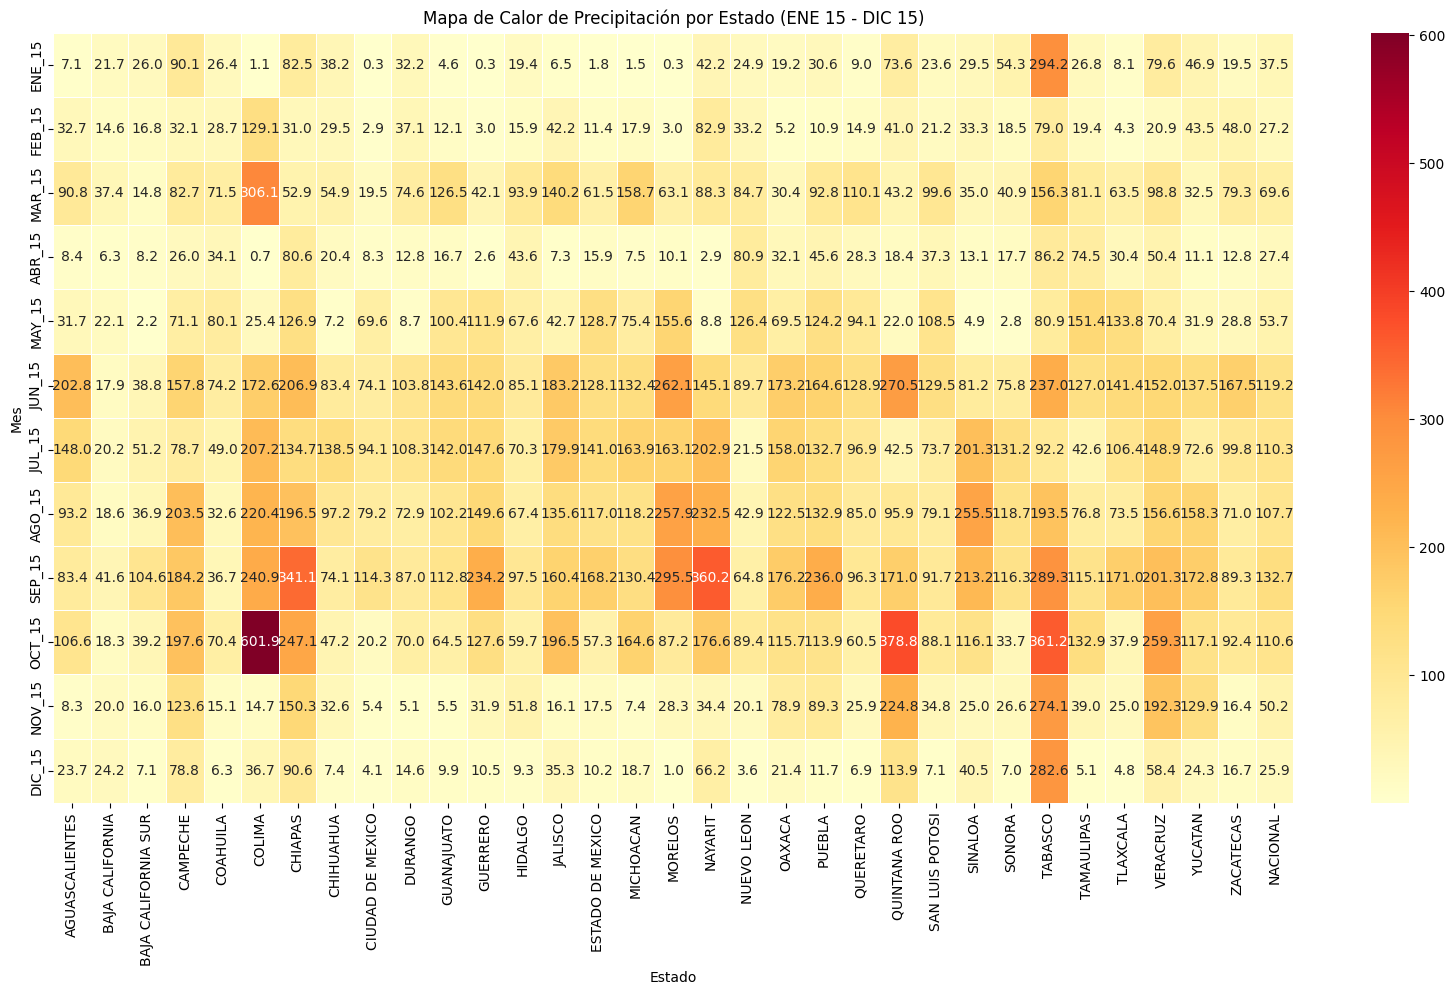

In [81]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_15", "FEB_15", "MAR_15", "ABR_15", "MAY_15", "JUN_15", "JUL_15", "AGO_15", "SEP_15", "OCT_15", "NOV_15", "DIC_15"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (ENE 15 - DIC 15)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\1329190400.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


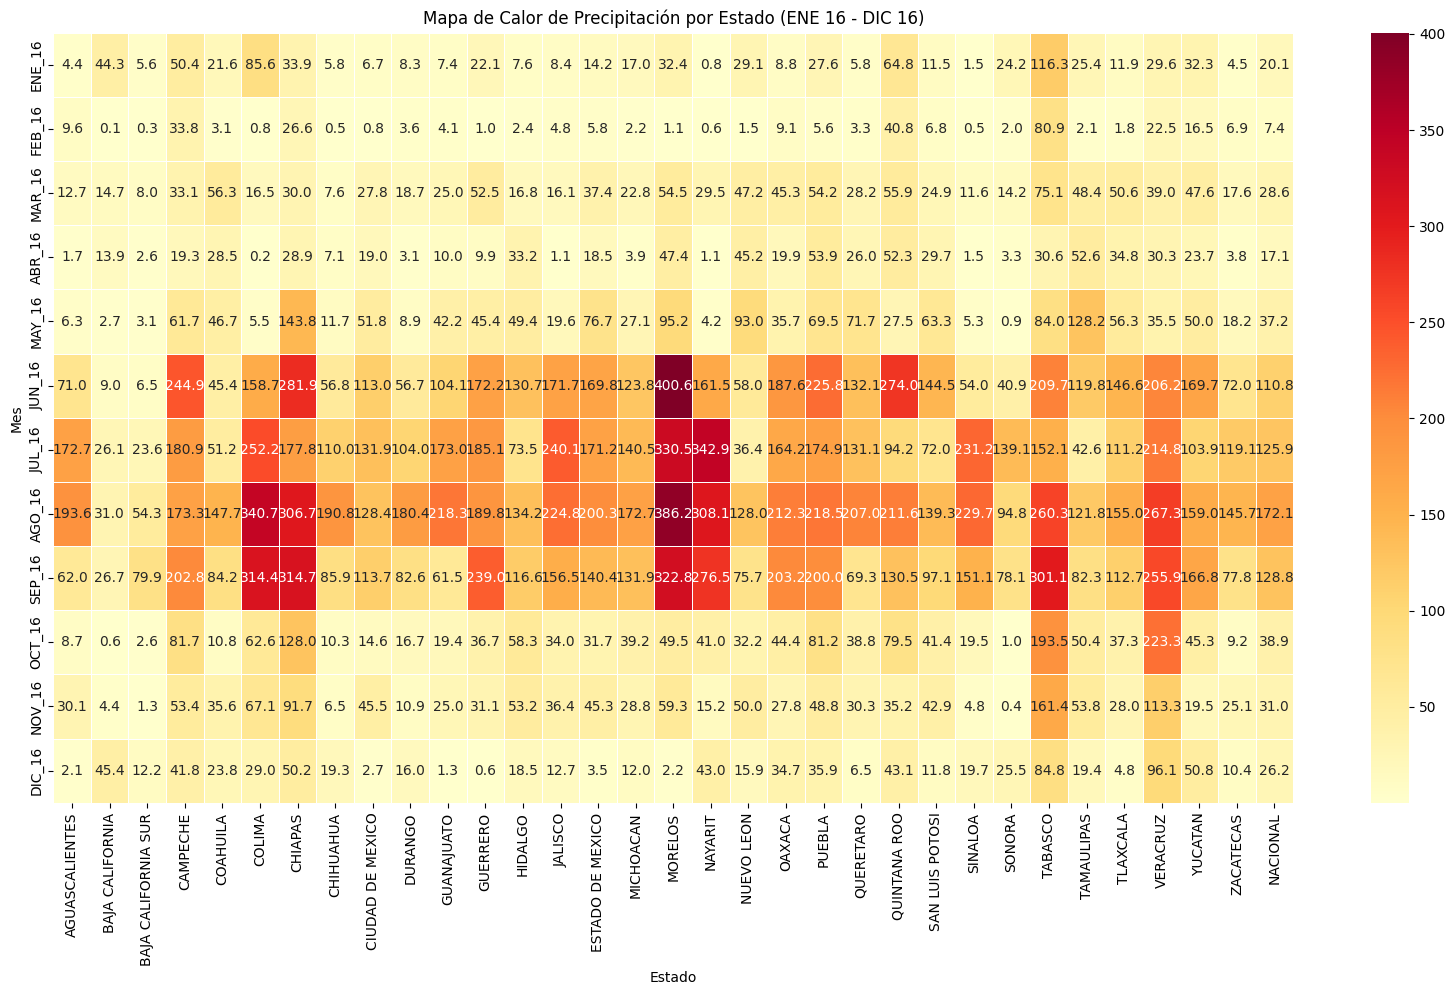

In [82]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_16", "FEB_16", "MAR_16", "ABR_16", "MAY_16", "JUN_16", "JUL_16", "AGO_16", "SEP_16", "OCT_16", "NOV_16", "DIC_16"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (ENE 16 - DIC 16)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\3307894504.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


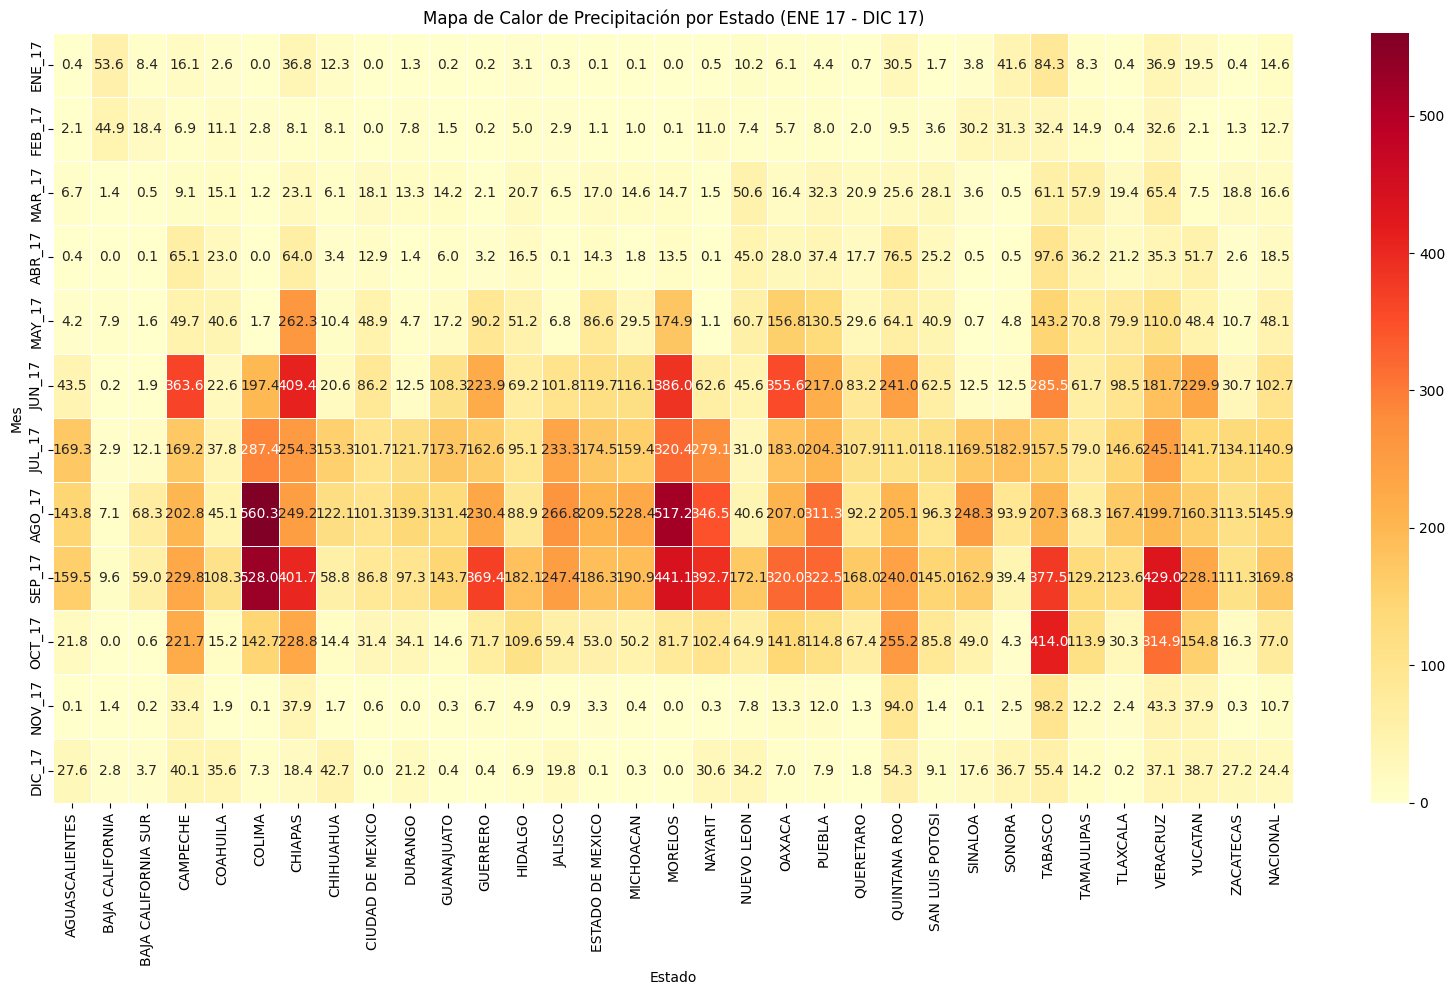

In [83]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_17", "FEB_17", "MAR_17", "ABR_17", "MAY_17", "JUN_17", "JUL_17", "AGO_17", "SEP_17", "OCT_17", "NOV_17", "DIC_17"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (ENE 17 - DIC 17)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\524541265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


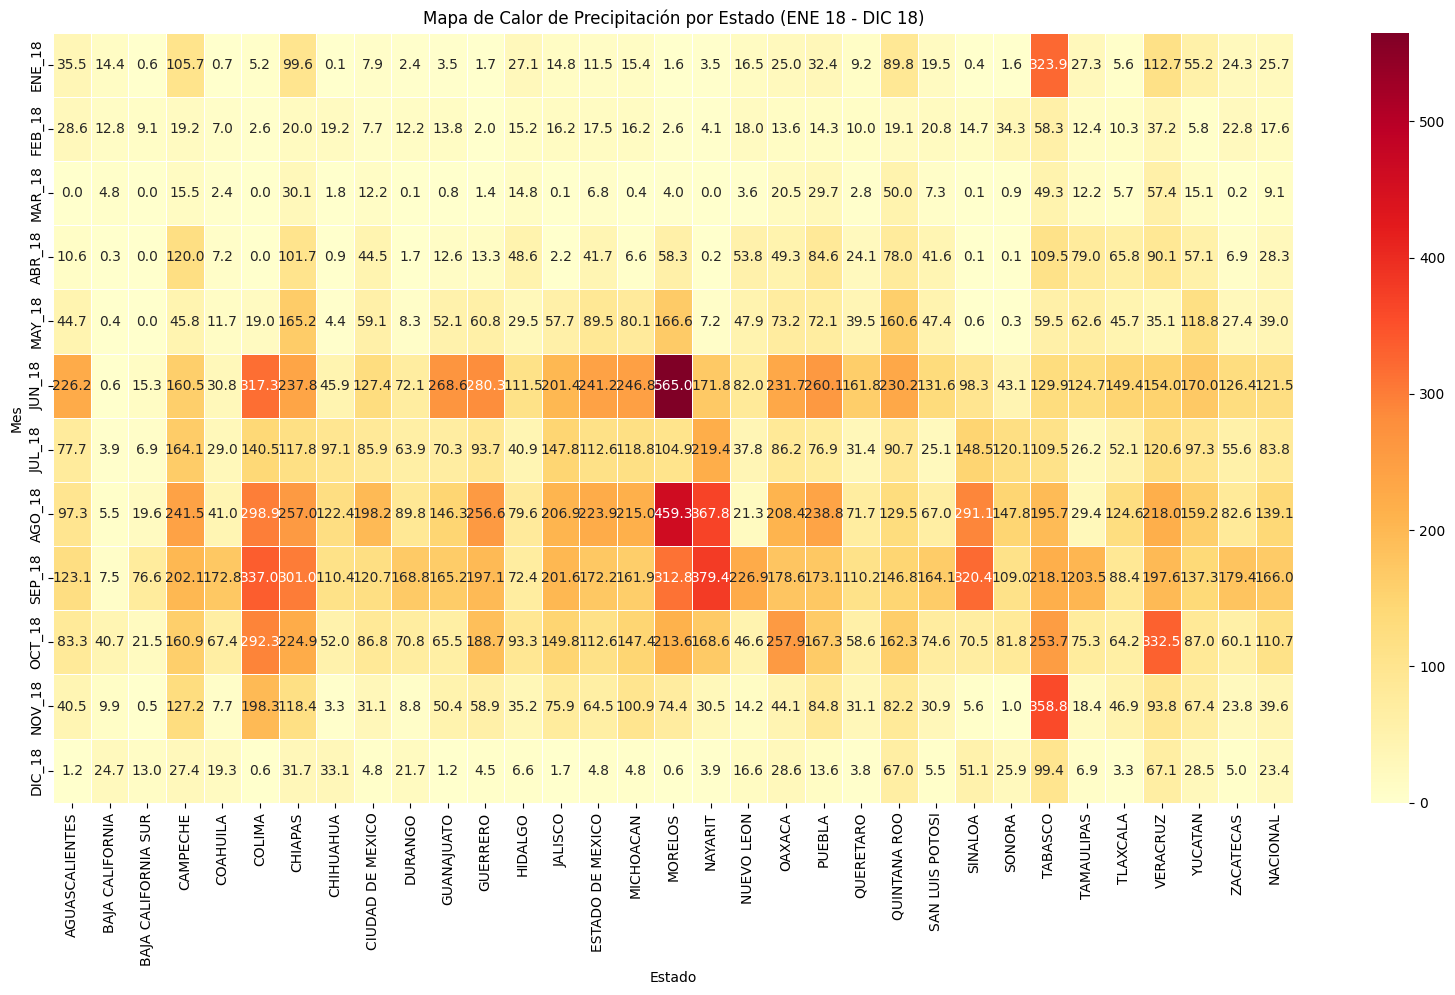

In [84]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_18", "FEB_18", "MAR_18", "ABR_18", "MAY_18", "JUN_18", "JUL_18", "AGO_18", "SEP_18", "OCT_18", "NOV_18", "DIC_18"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (ENE 18 - DIC 18)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\2311104024.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


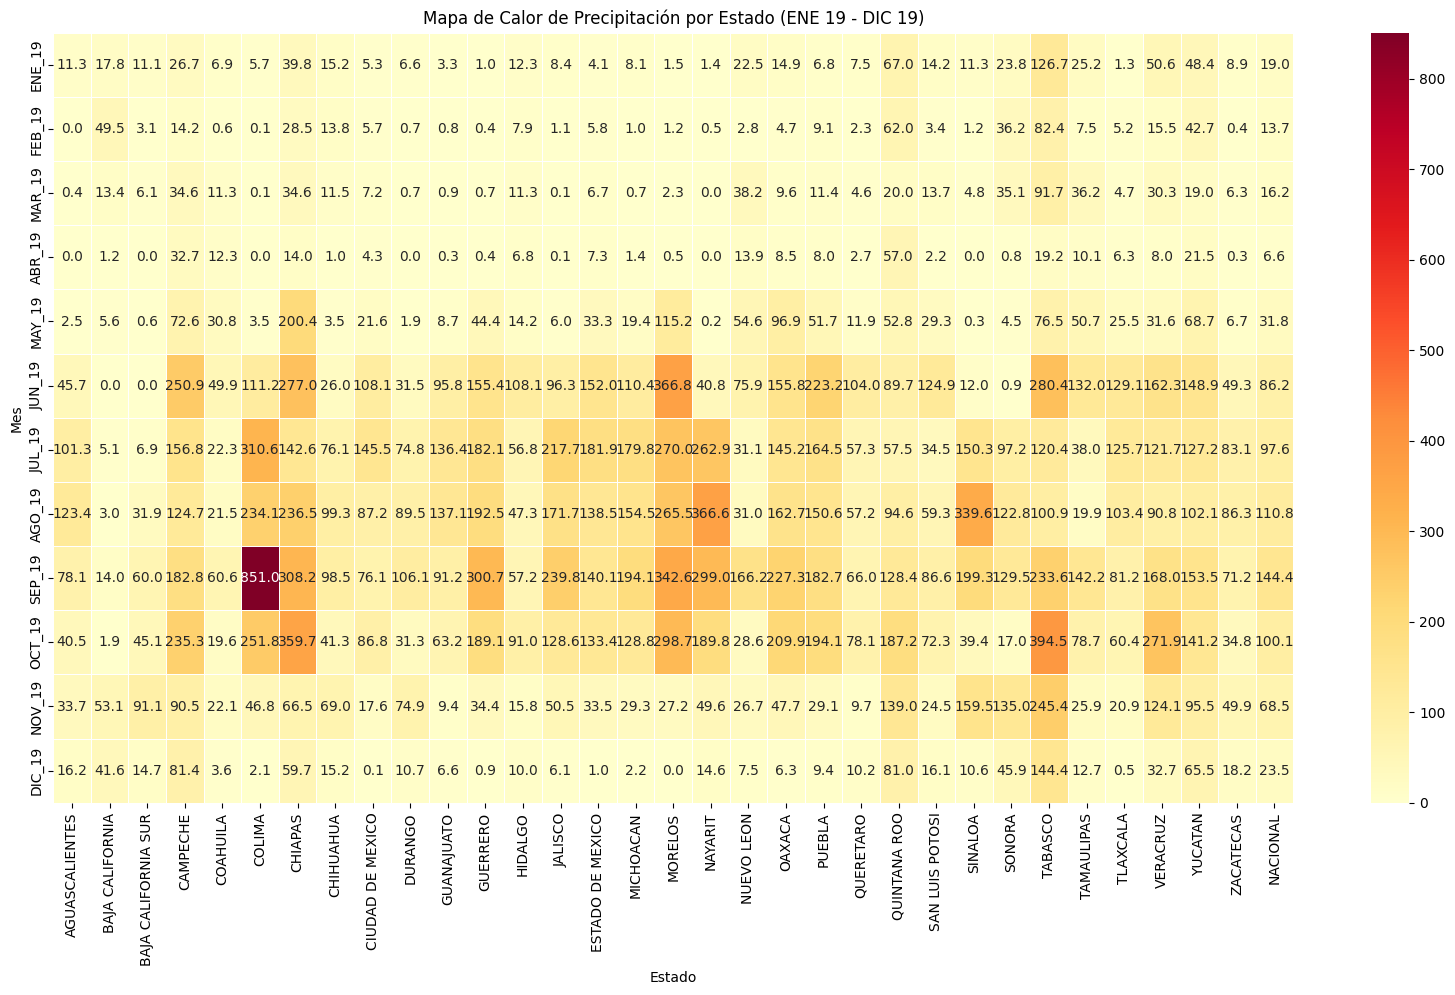

In [85]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_19", "FEB_19", "MAR_19", "ABR_19", "MAY_19", "JUN_19", "JUL_19", "AGO_19", "SEP_19", "OCT_19", "NOV_19", "DIC_19"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (ENE 19 - DIC 19)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\2645036330.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


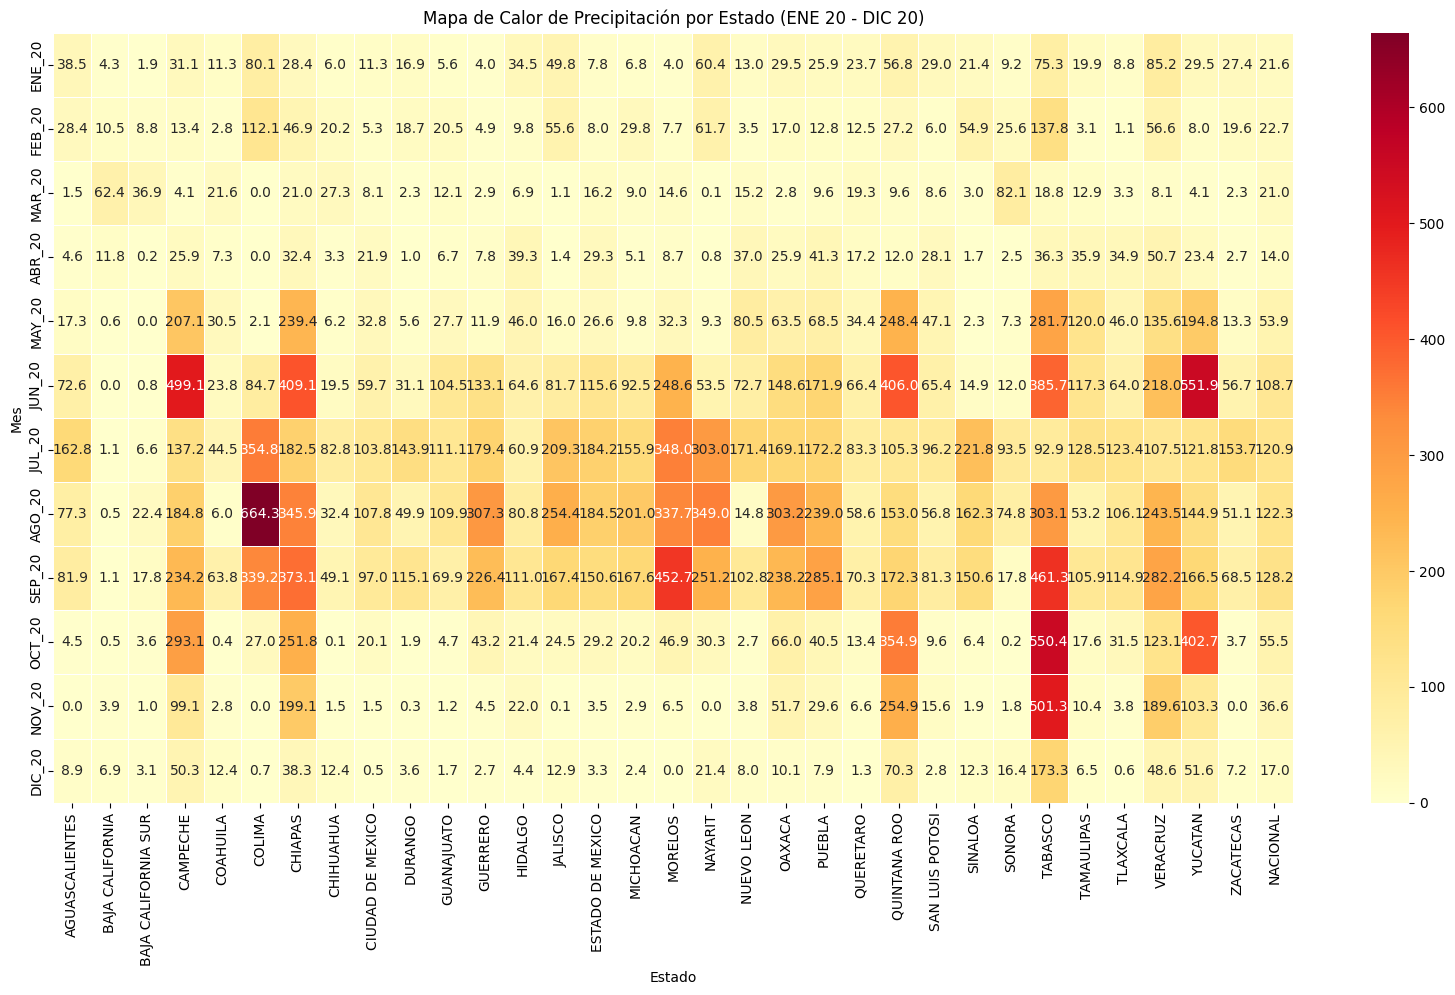

In [86]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_20", "FEB_20", "MAR_20", "ABR_20", "MAY_20", "JUN_20", "JUL_20", "AGO_20", "SEP_20", "OCT_20", "NOV_20", "DIC_20"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (ENE 20 - DIC 20)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

In [90]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_21", "FEB_21", "MAR_21", "ABR_21", "MAY_21", "JUN_21", "JUL_21", "AGO_21", "SEP_21", "OCT_21", "NOV_21", "DIC_21"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (ENE 21 - DI 21)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\3957416553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


C:\Users\him_6\AppData\Local\Temp\ipykernel_13572\742651170.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


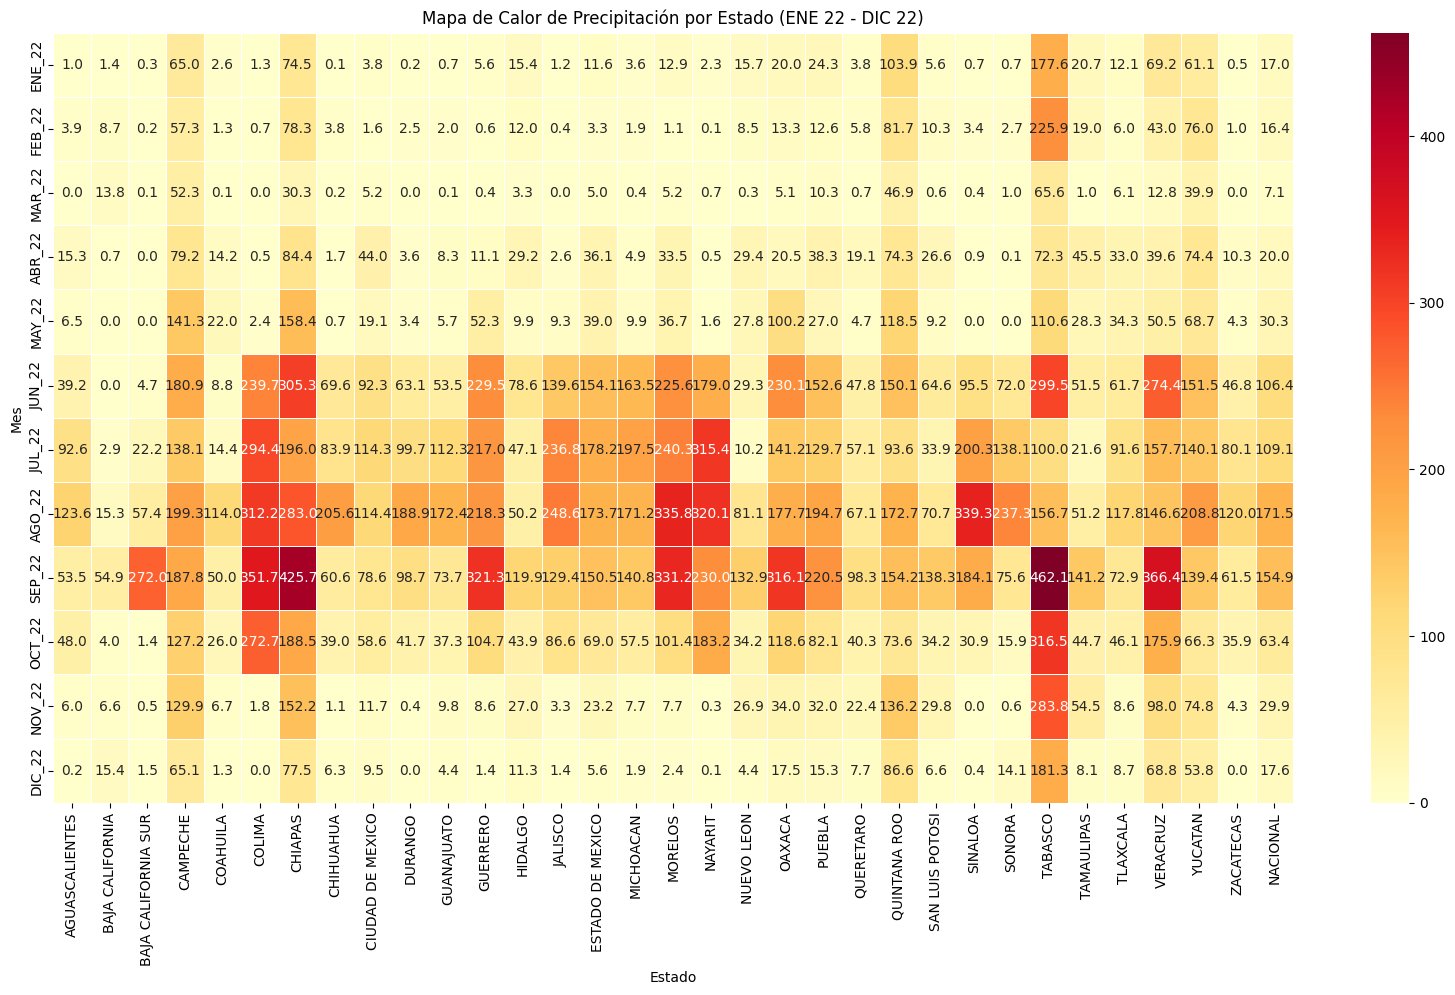

In [91]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_22", "FEB_22", "MAR_22", "ABR_22", "MAY_22", "JUN_22", "JUL_22", "AGO_22", "SEP_22", "OCT_22", "NOV_22", "DIC_22"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (ENE 22 - DIC 22)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

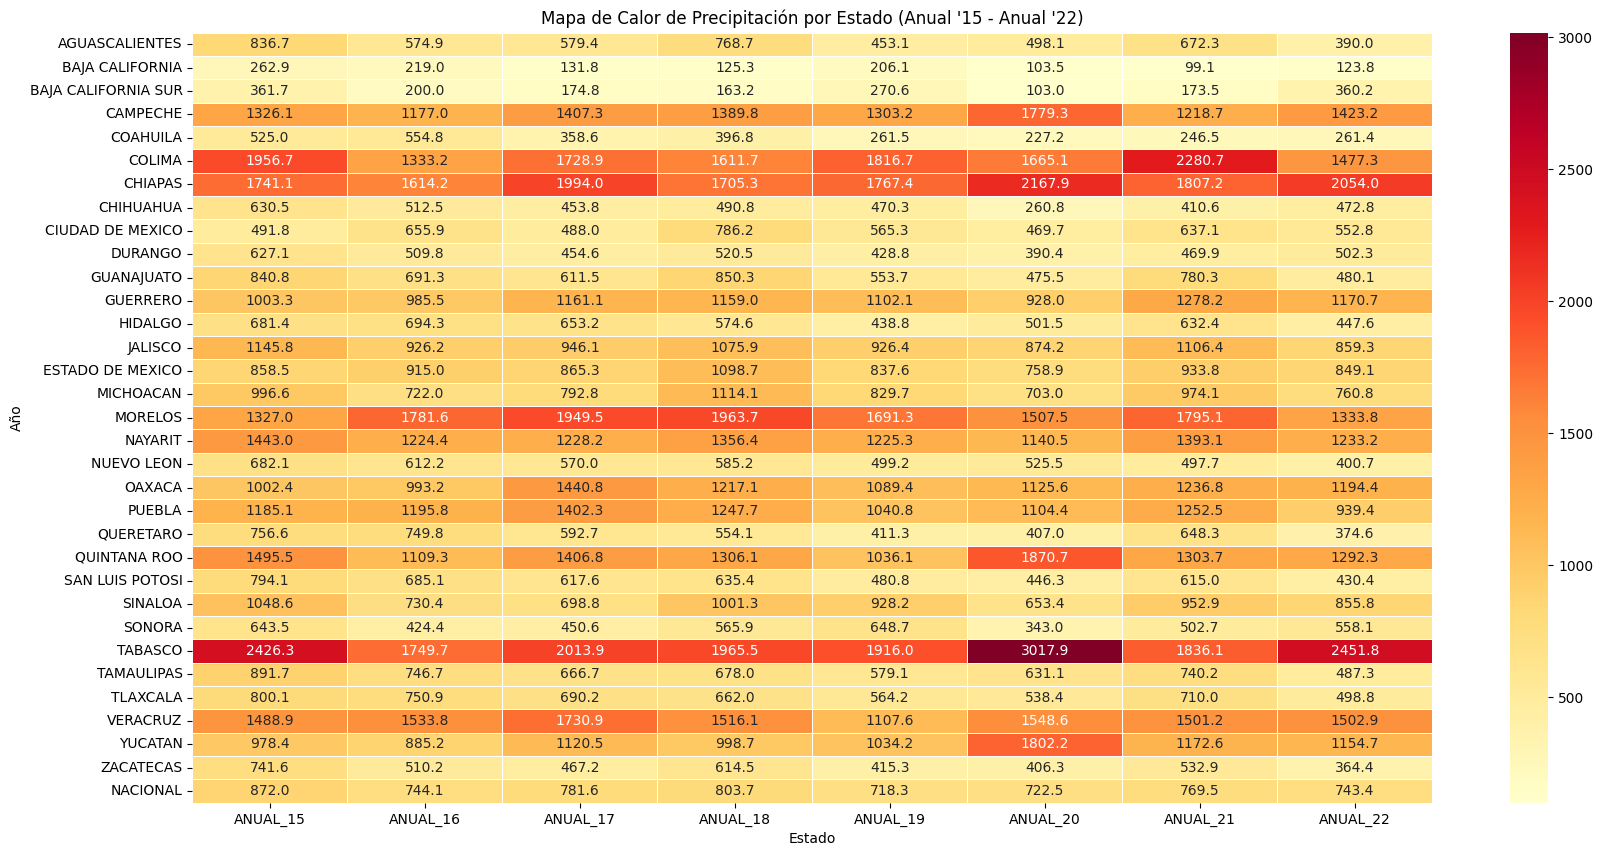

In [98]:
# Columnas que quieres seleccionar (ANUAL_15 a ANUAL_22)
columns_to_plot = ["ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]

# DataFrame con las columnas seleccionadas
subset_df = anuales_precip[columns_to_plot]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# Configura el índice del DataFrame con los nombres de los estados
subset_df.index = anuales_precip["ENTIDAD_15"]

# Mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (Anual '15 - Anual '22)")
plt.xlabel("Estado")
plt.ylabel("Año")

# Muestra el gráfico
plt.show()


In [99]:
# Lista de estados en cada región
regiones = {
    'Región Noroeste': ['BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'CHIHUAHUA', 'DURANGO', 'SINALOA', 'SONORA', 'JALISCO', 'NAYARIT'],
    'Región Noreste':  ["COAHUILA", "NUEVO LEON", "TAMAULIPAS"],
    'Centro Norte': ['AGUASCALIENTES', 'GUANAJUATO', 'QUERÉTARO', 'SAN LUIS POTOSÍ', 'ZACATECAS'],
    'Centro Occidente': ['COLIMA', 'MICHOACÁN', "ESTADO DE MÉXICO", 'HIDALGO'],
    'Centro Oriente': ['PUEBLA', 'TLAXCALA'],
    "Centro Sur": ["CIUDAD DE MÉXICO", "MORELOS", "GUERRERO"],
    "Suroeste": ["CHIAPAS", "OAXACA"],
    "Sureste": ["CAMPECHE", "VERACRUZ", "QUINTANA ROO", "TABASCO", "YUCATÁN"]
}

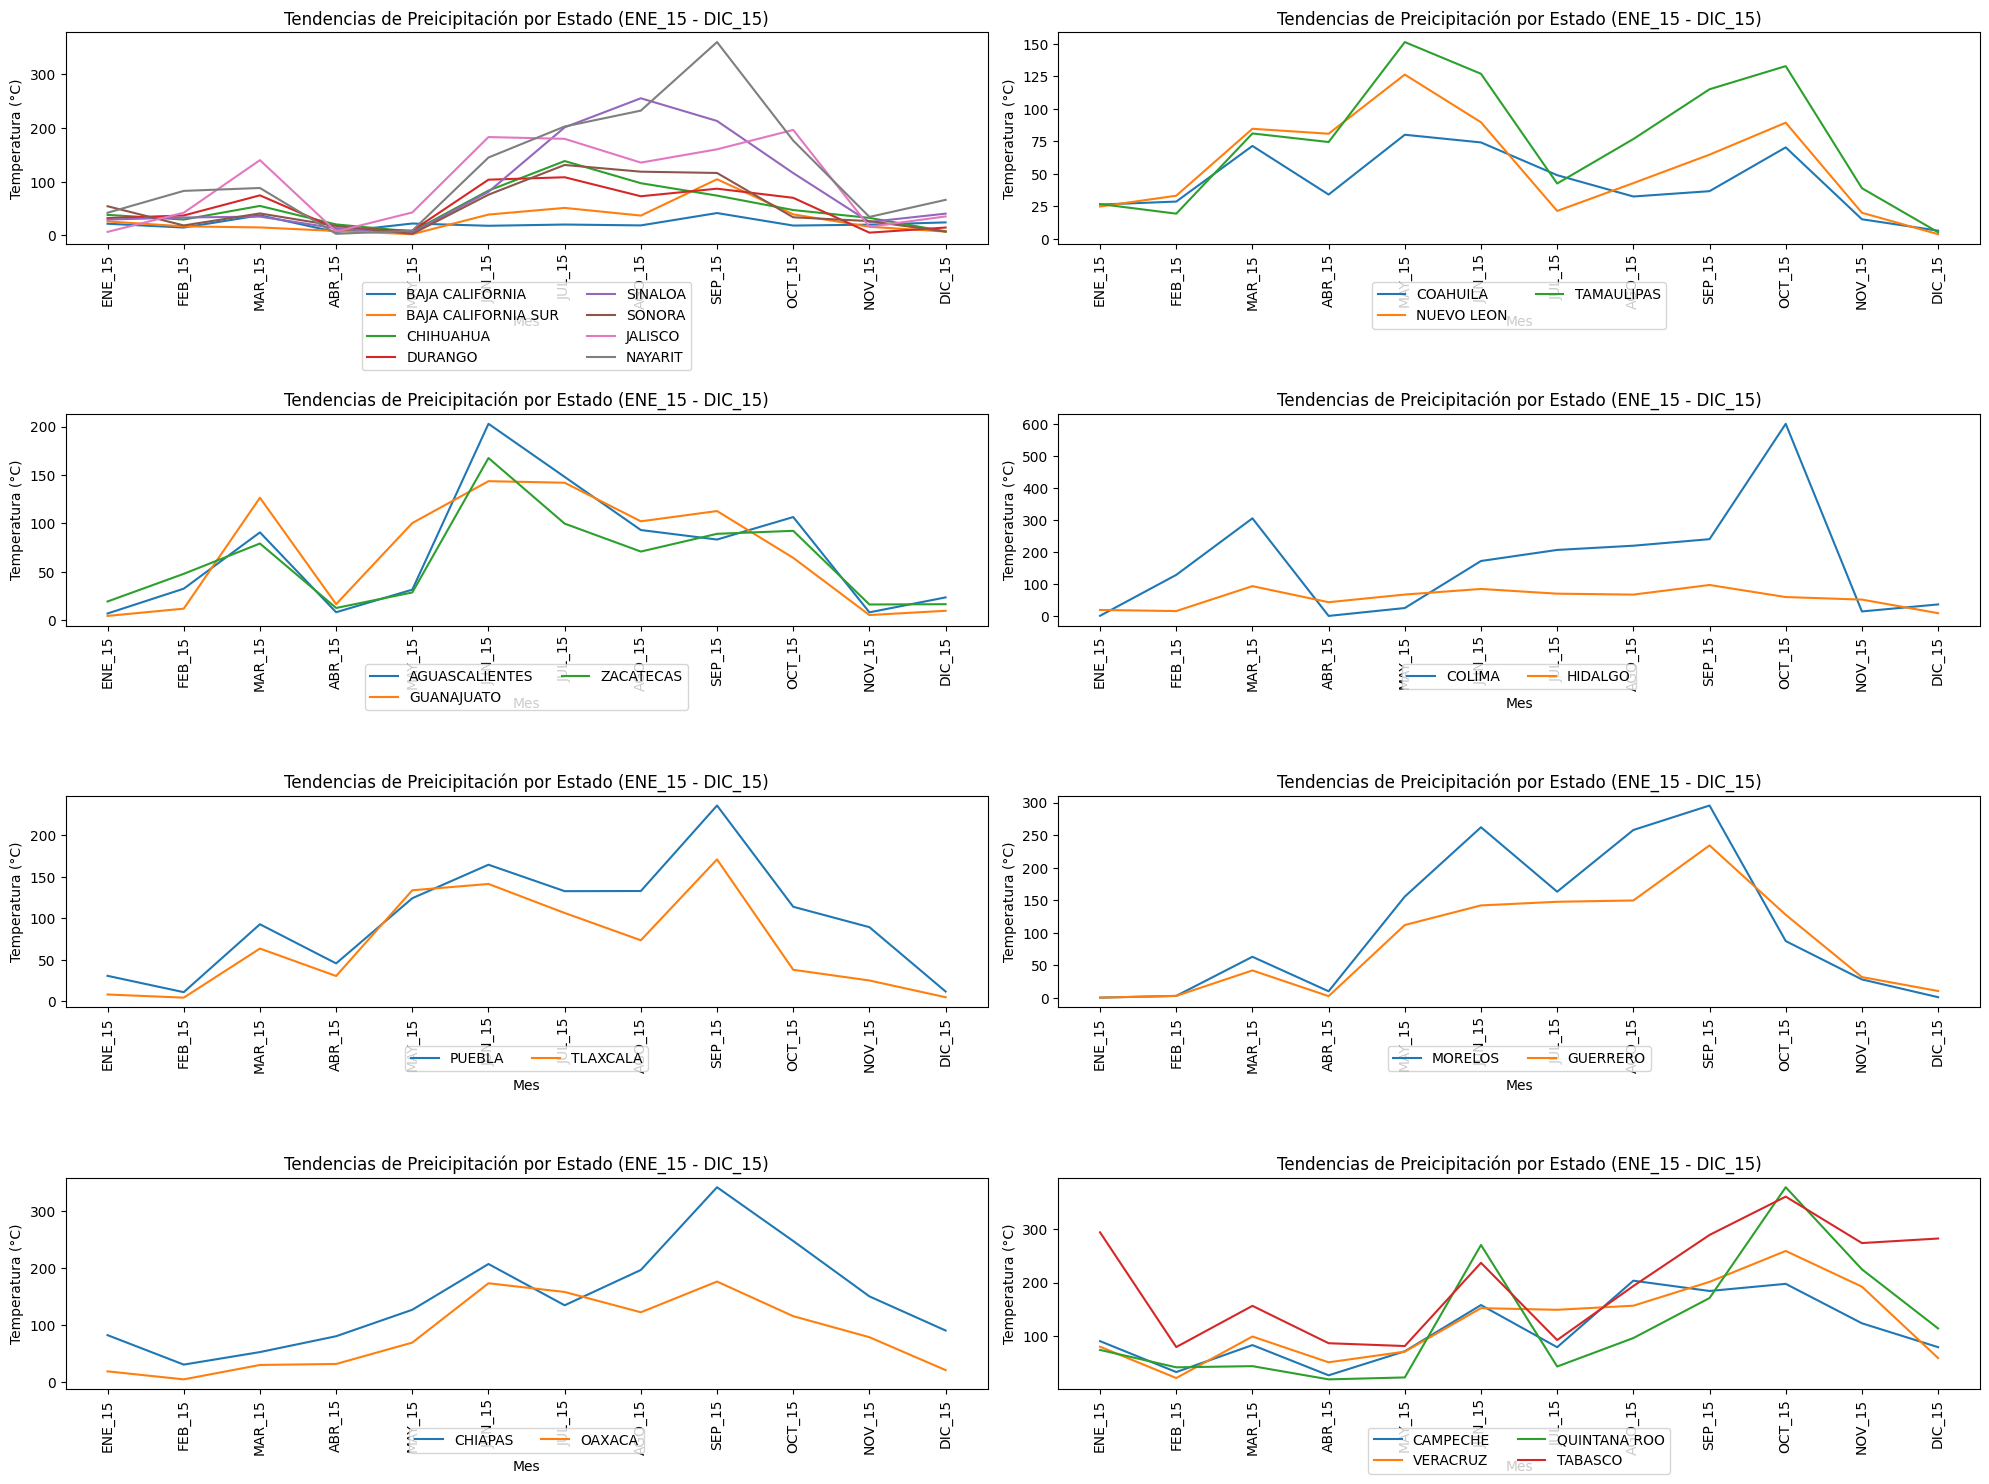

In [100]:
# Selecciona las columnas de interés (por ejemplo, ENE_15 hasta DIC_15)
columns_to_plot = ["ENE_15", "FEB_15", "MAR_15", "ABR_15", "MAY_15", "JUN_15", "JUL_15", "AGO_15", "SEP_15", "OCT_15", "NOV_15", "DIC_15"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Preicipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Temperatura (°C)")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()


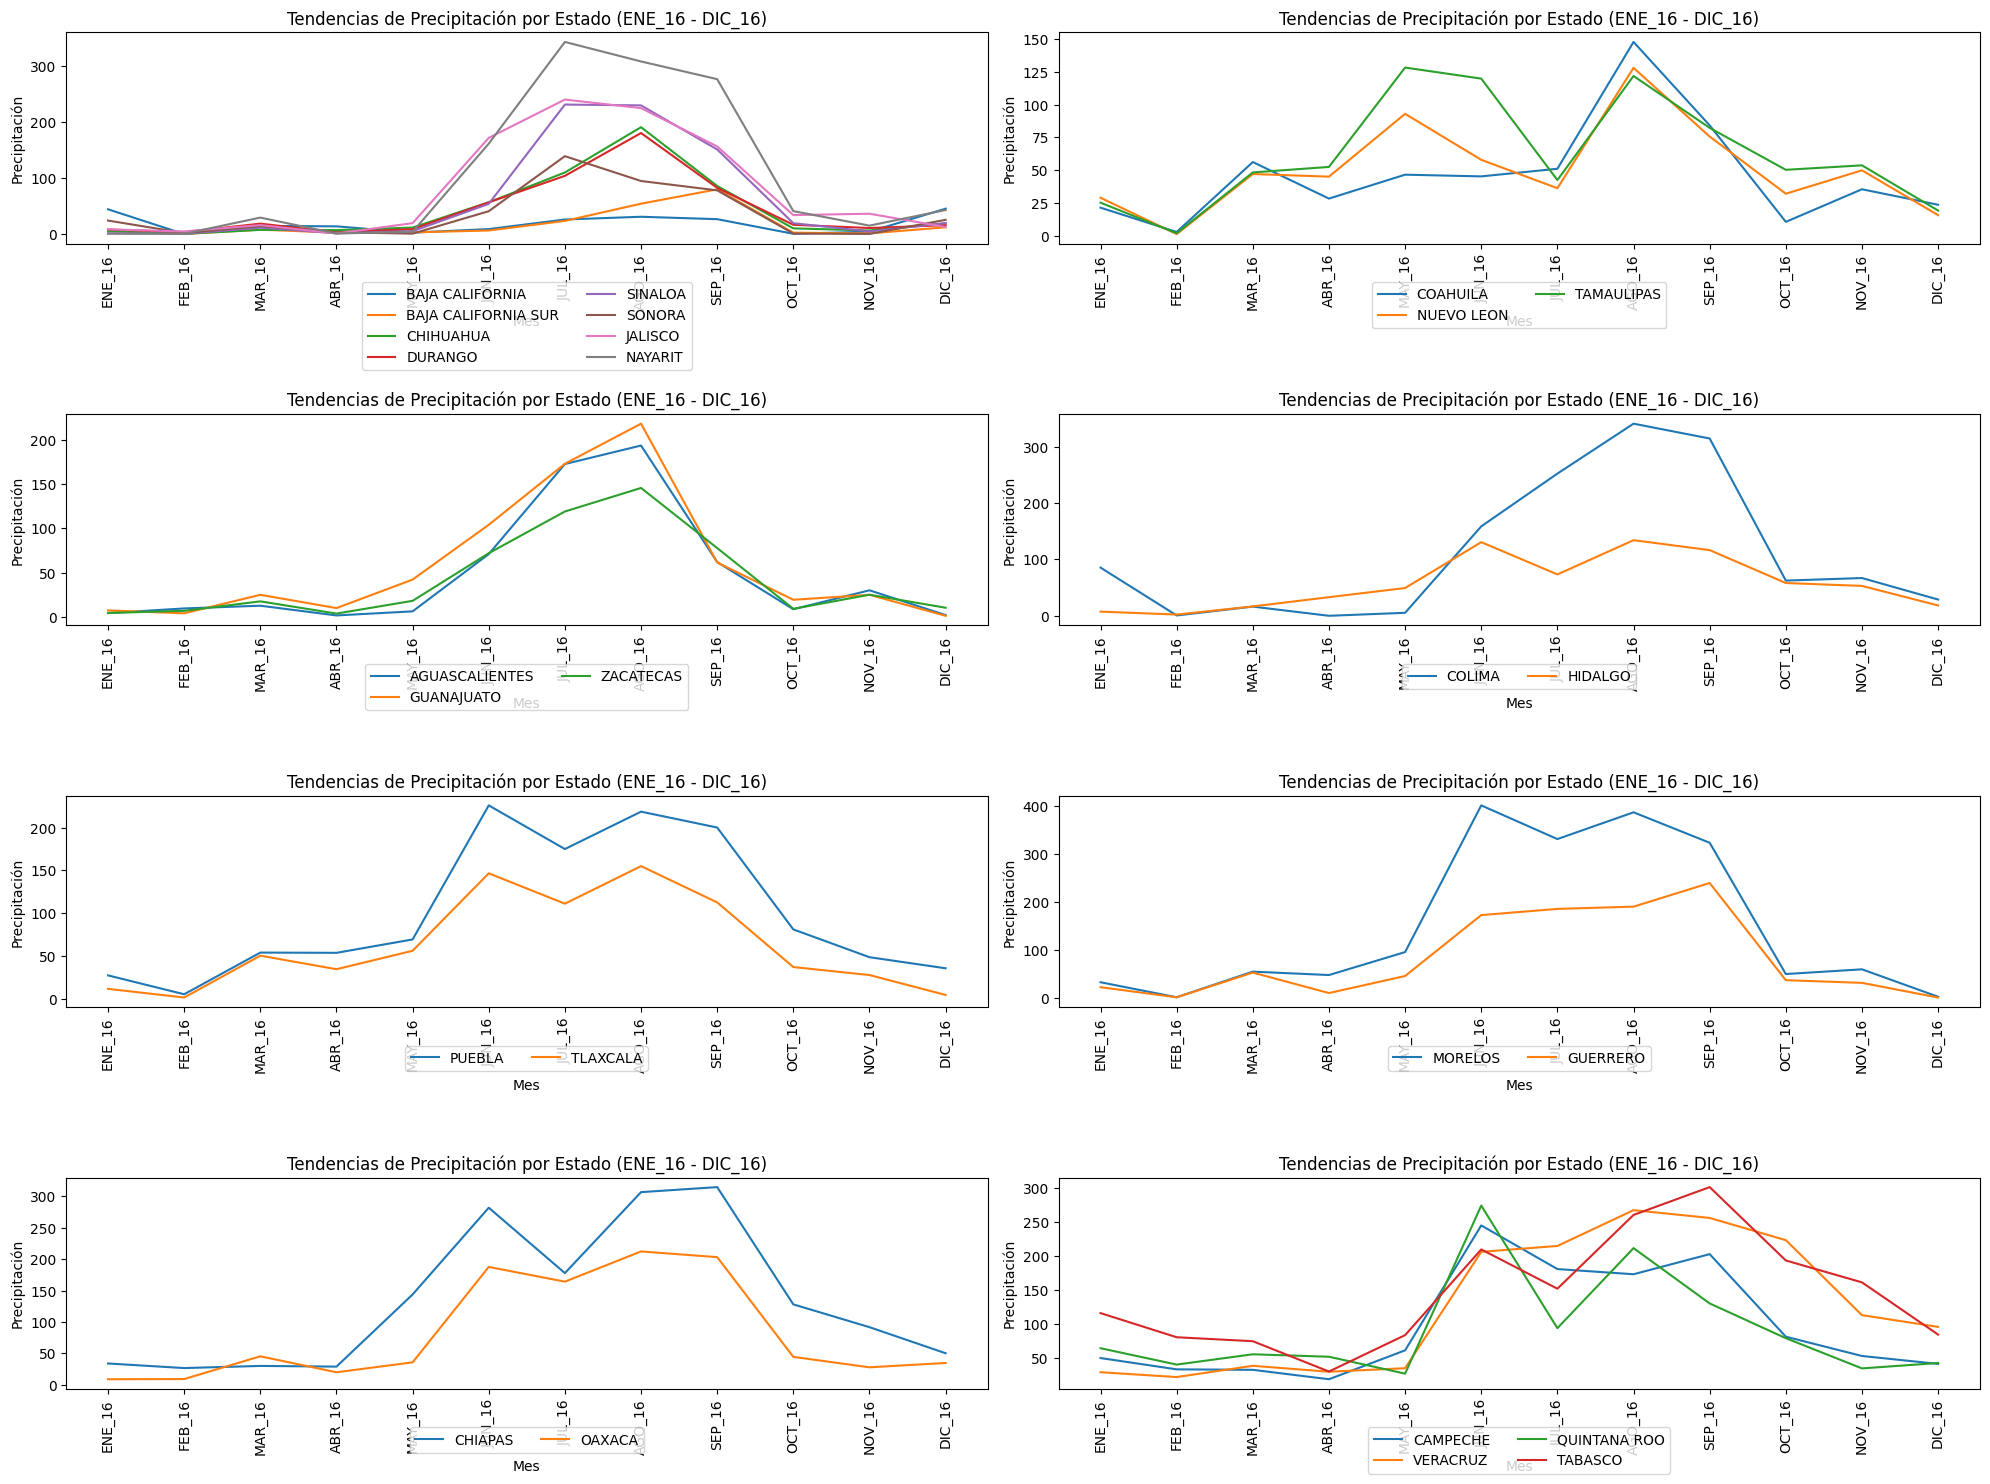

In [101]:
# Selecciona las columnas de interés (por ejemplo, ENE_16 hasta DIC_16)
columns_to_plot = ["ENE_16", "FEB_16", "MAR_16", "ABR_16", "MAY_16", "JUN_16", "JUL_16", "AGO_16", "SEP_16", "OCT_16", "NOV_16", "DIC_16"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

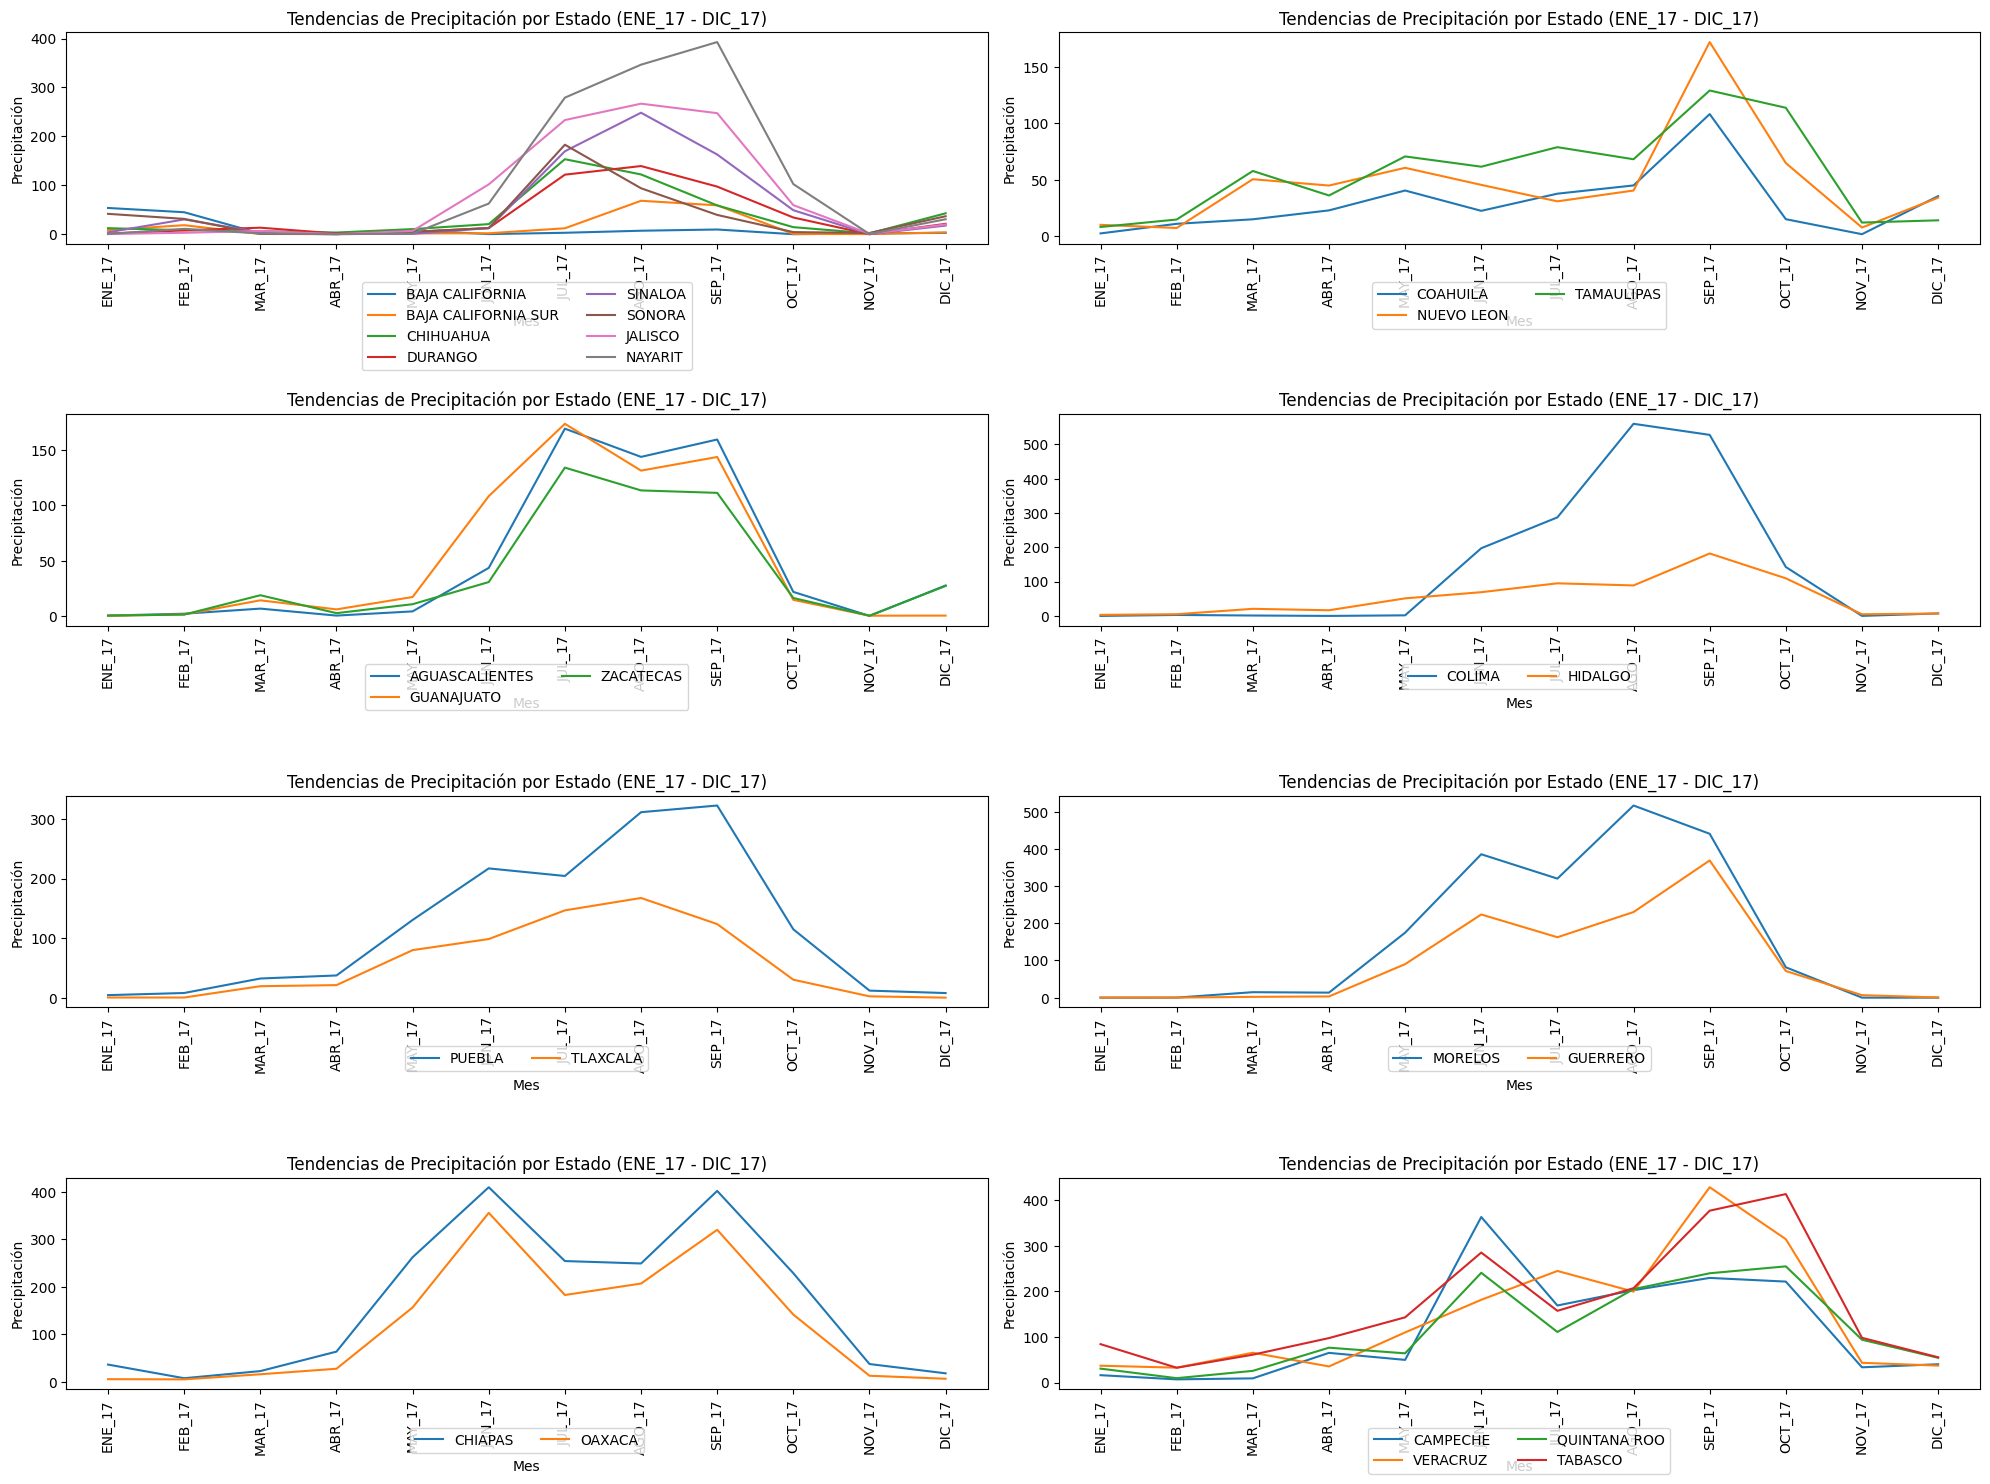

In [102]:
# Selecciona las columnas de interés (por ejemplo, ENE_17 hasta DIC_17)
columns_to_plot = ["ENE_17", "FEB_17", "MAR_17", "ABR_17", "MAY_17", "JUN_17", "JUL_17", "AGO_17", "SEP_17", "OCT_17", "NOV_17", "DIC_17"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

In [103]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_18", "FEB_18", "MAR_18", "ABR_18", "MAY_18", "JUN_18", "JUL_18", "AGO_18", "SEP_18", "OCT_18", "NOV_18", "DIC_18"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

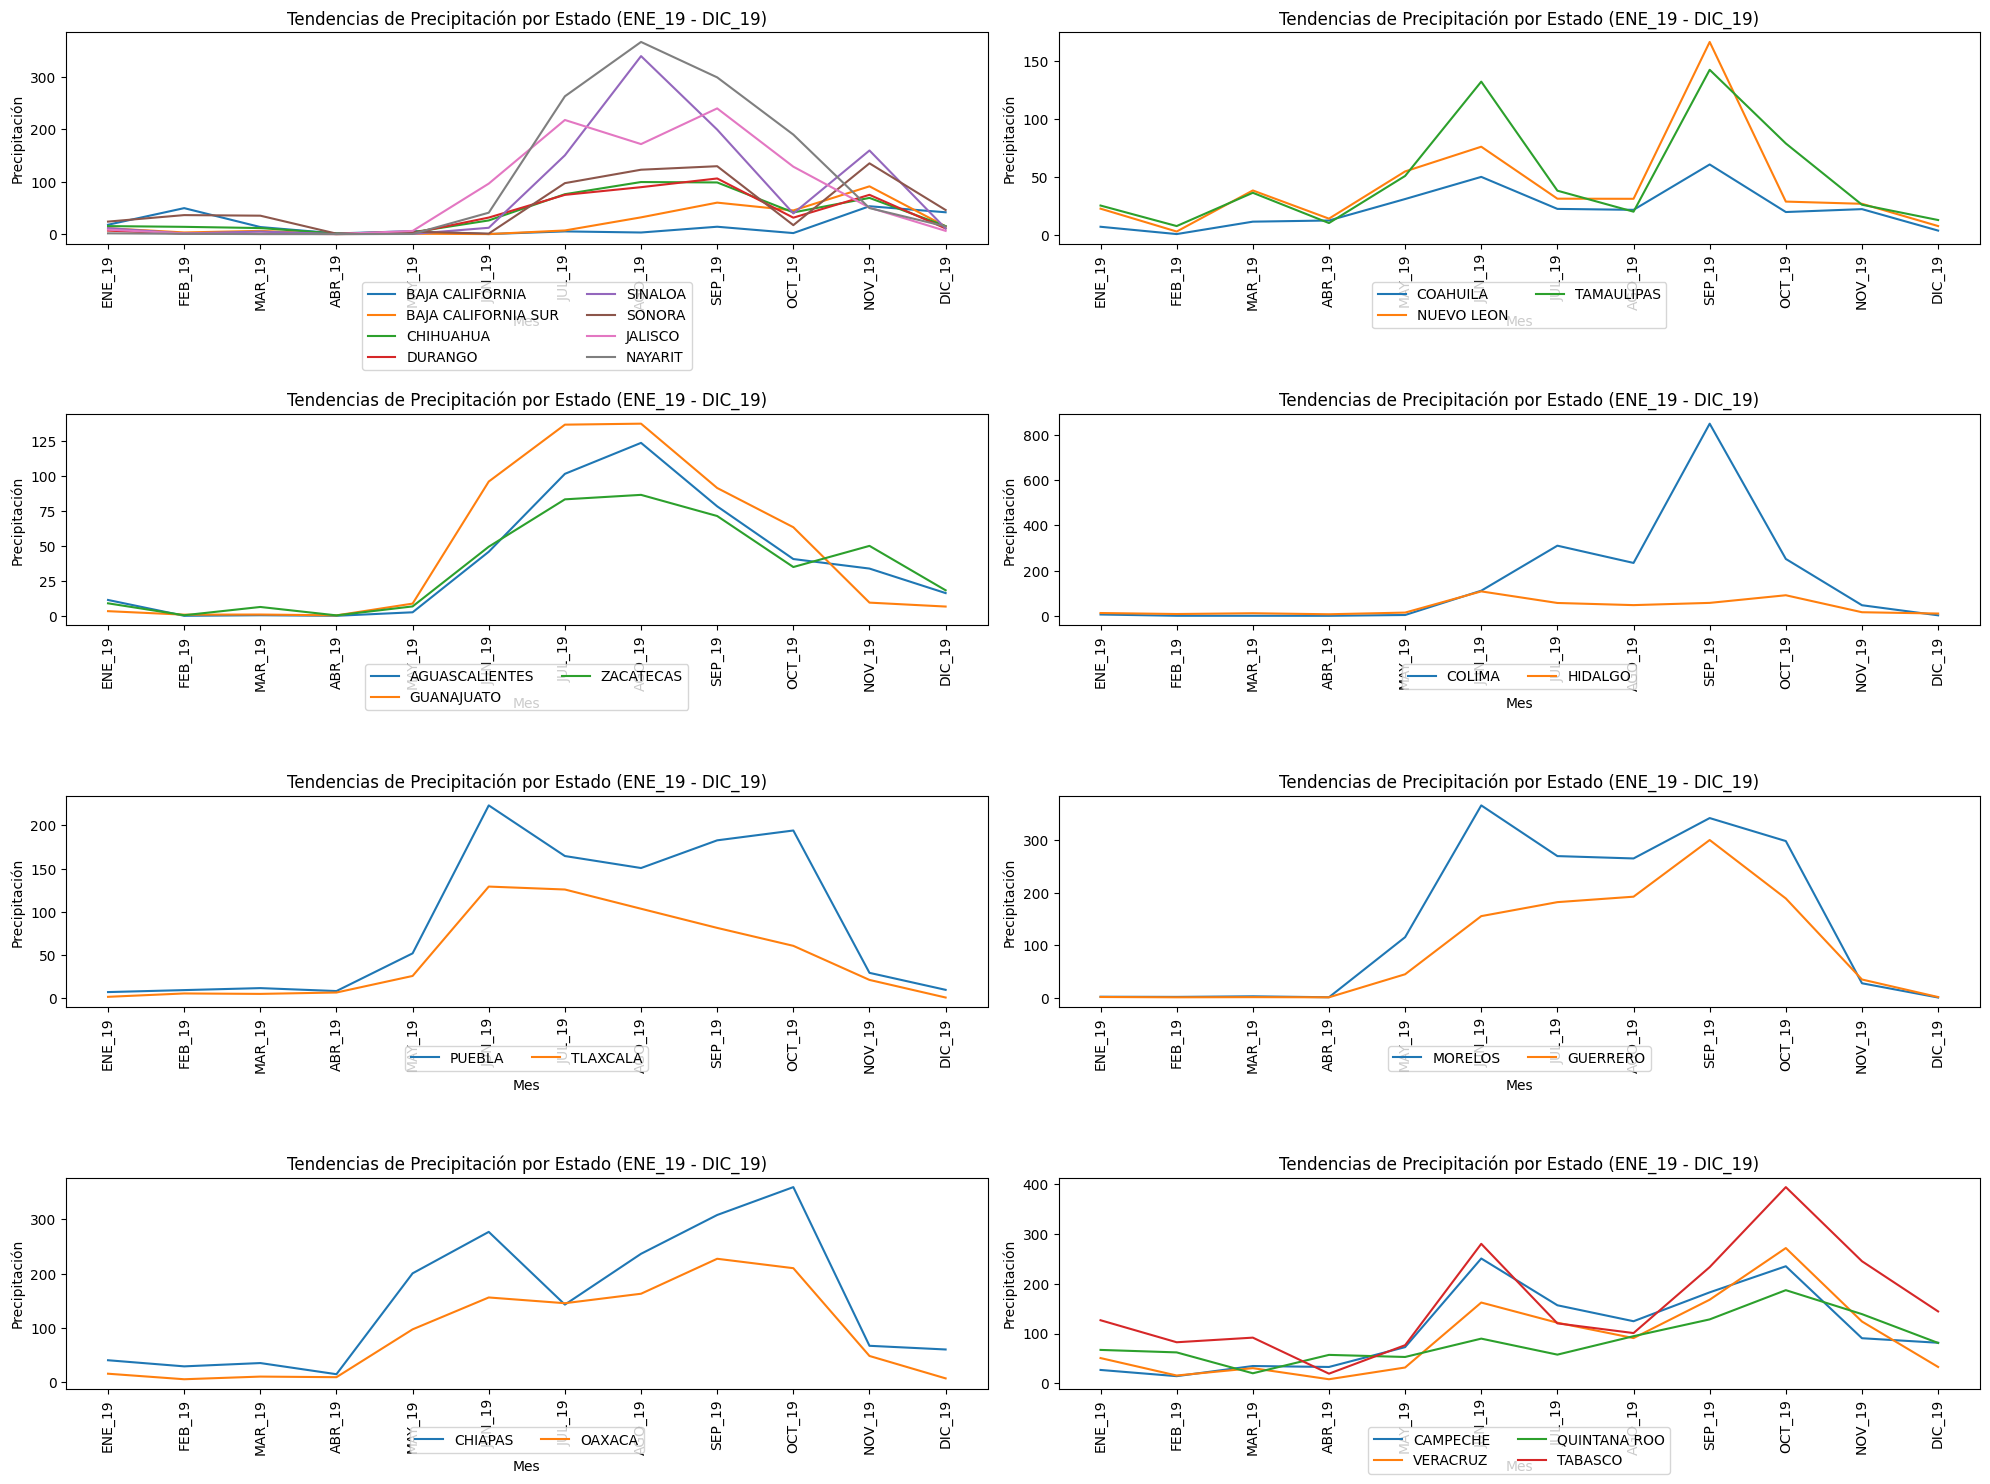

In [104]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_19", "FEB_19", "MAR_19", "ABR_19", "MAY_19", "JUN_19", "JUL_19", "AGO_19", "SEP_19", "OCT_19", "NOV_19", "DIC_19",]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

In [105]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_20", "FEB_20", "MAR_20", "ABR_20", "MAY_20", "JUN_20", "JUL_20", "AGO_20", "SEP_20", "OCT_20", "NOV_20", "DIC_20"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

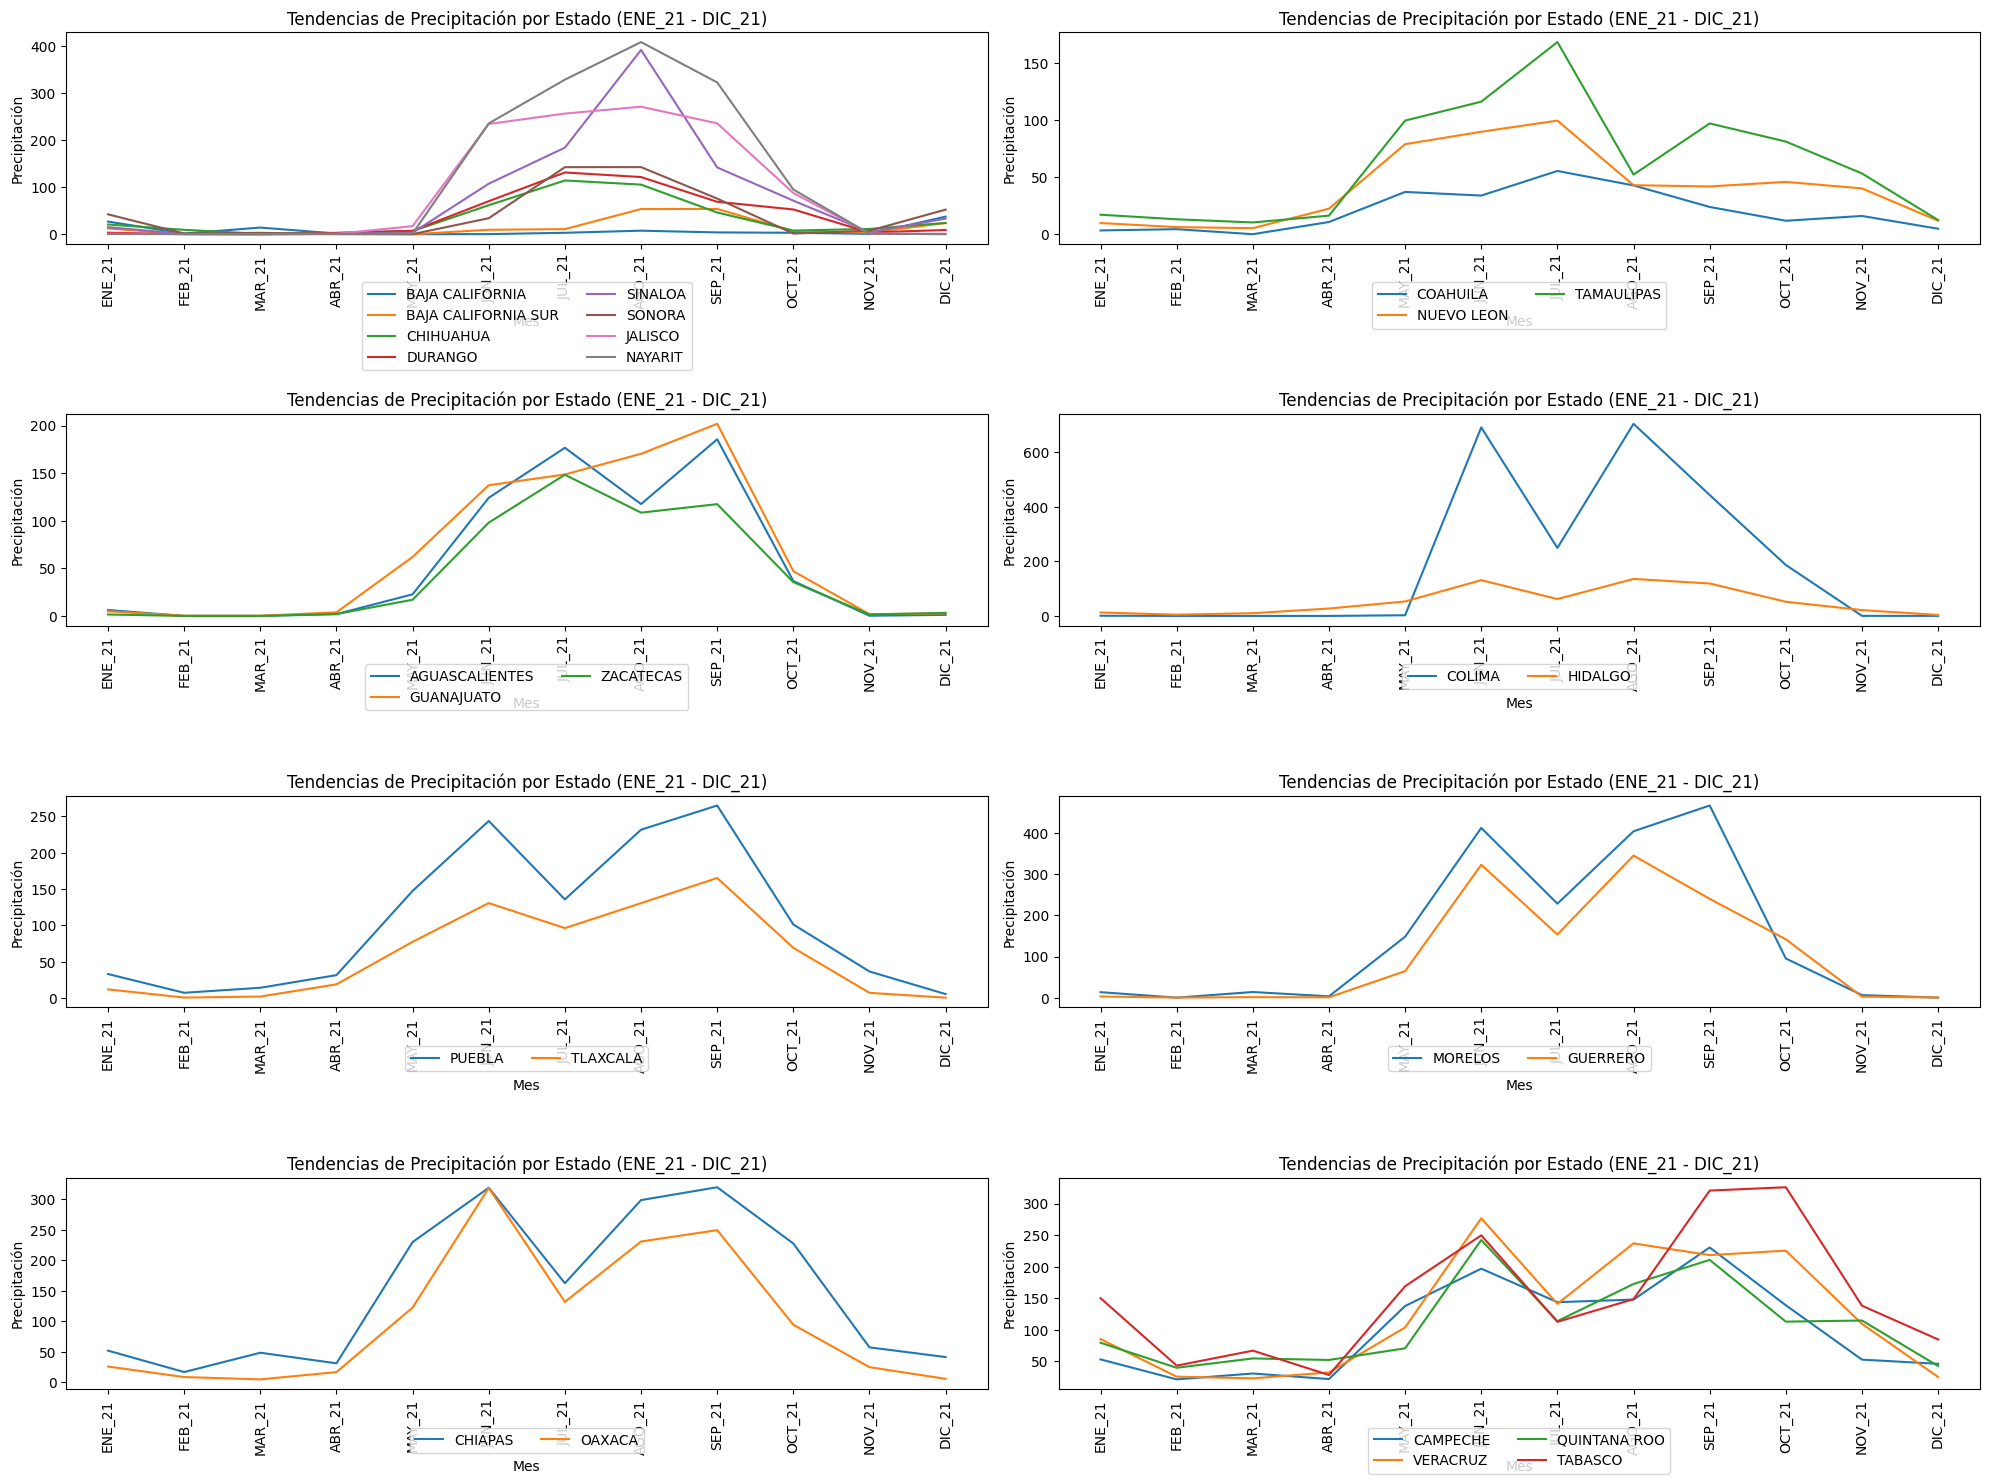

In [106]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_21", "FEB_21", "MAR_21", "ABR_21", "MAY_21", "JUN_21", "JUL_21", "AGO_21", "SEP_21", "OCT_21", "NOV_21", "DIC_21"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

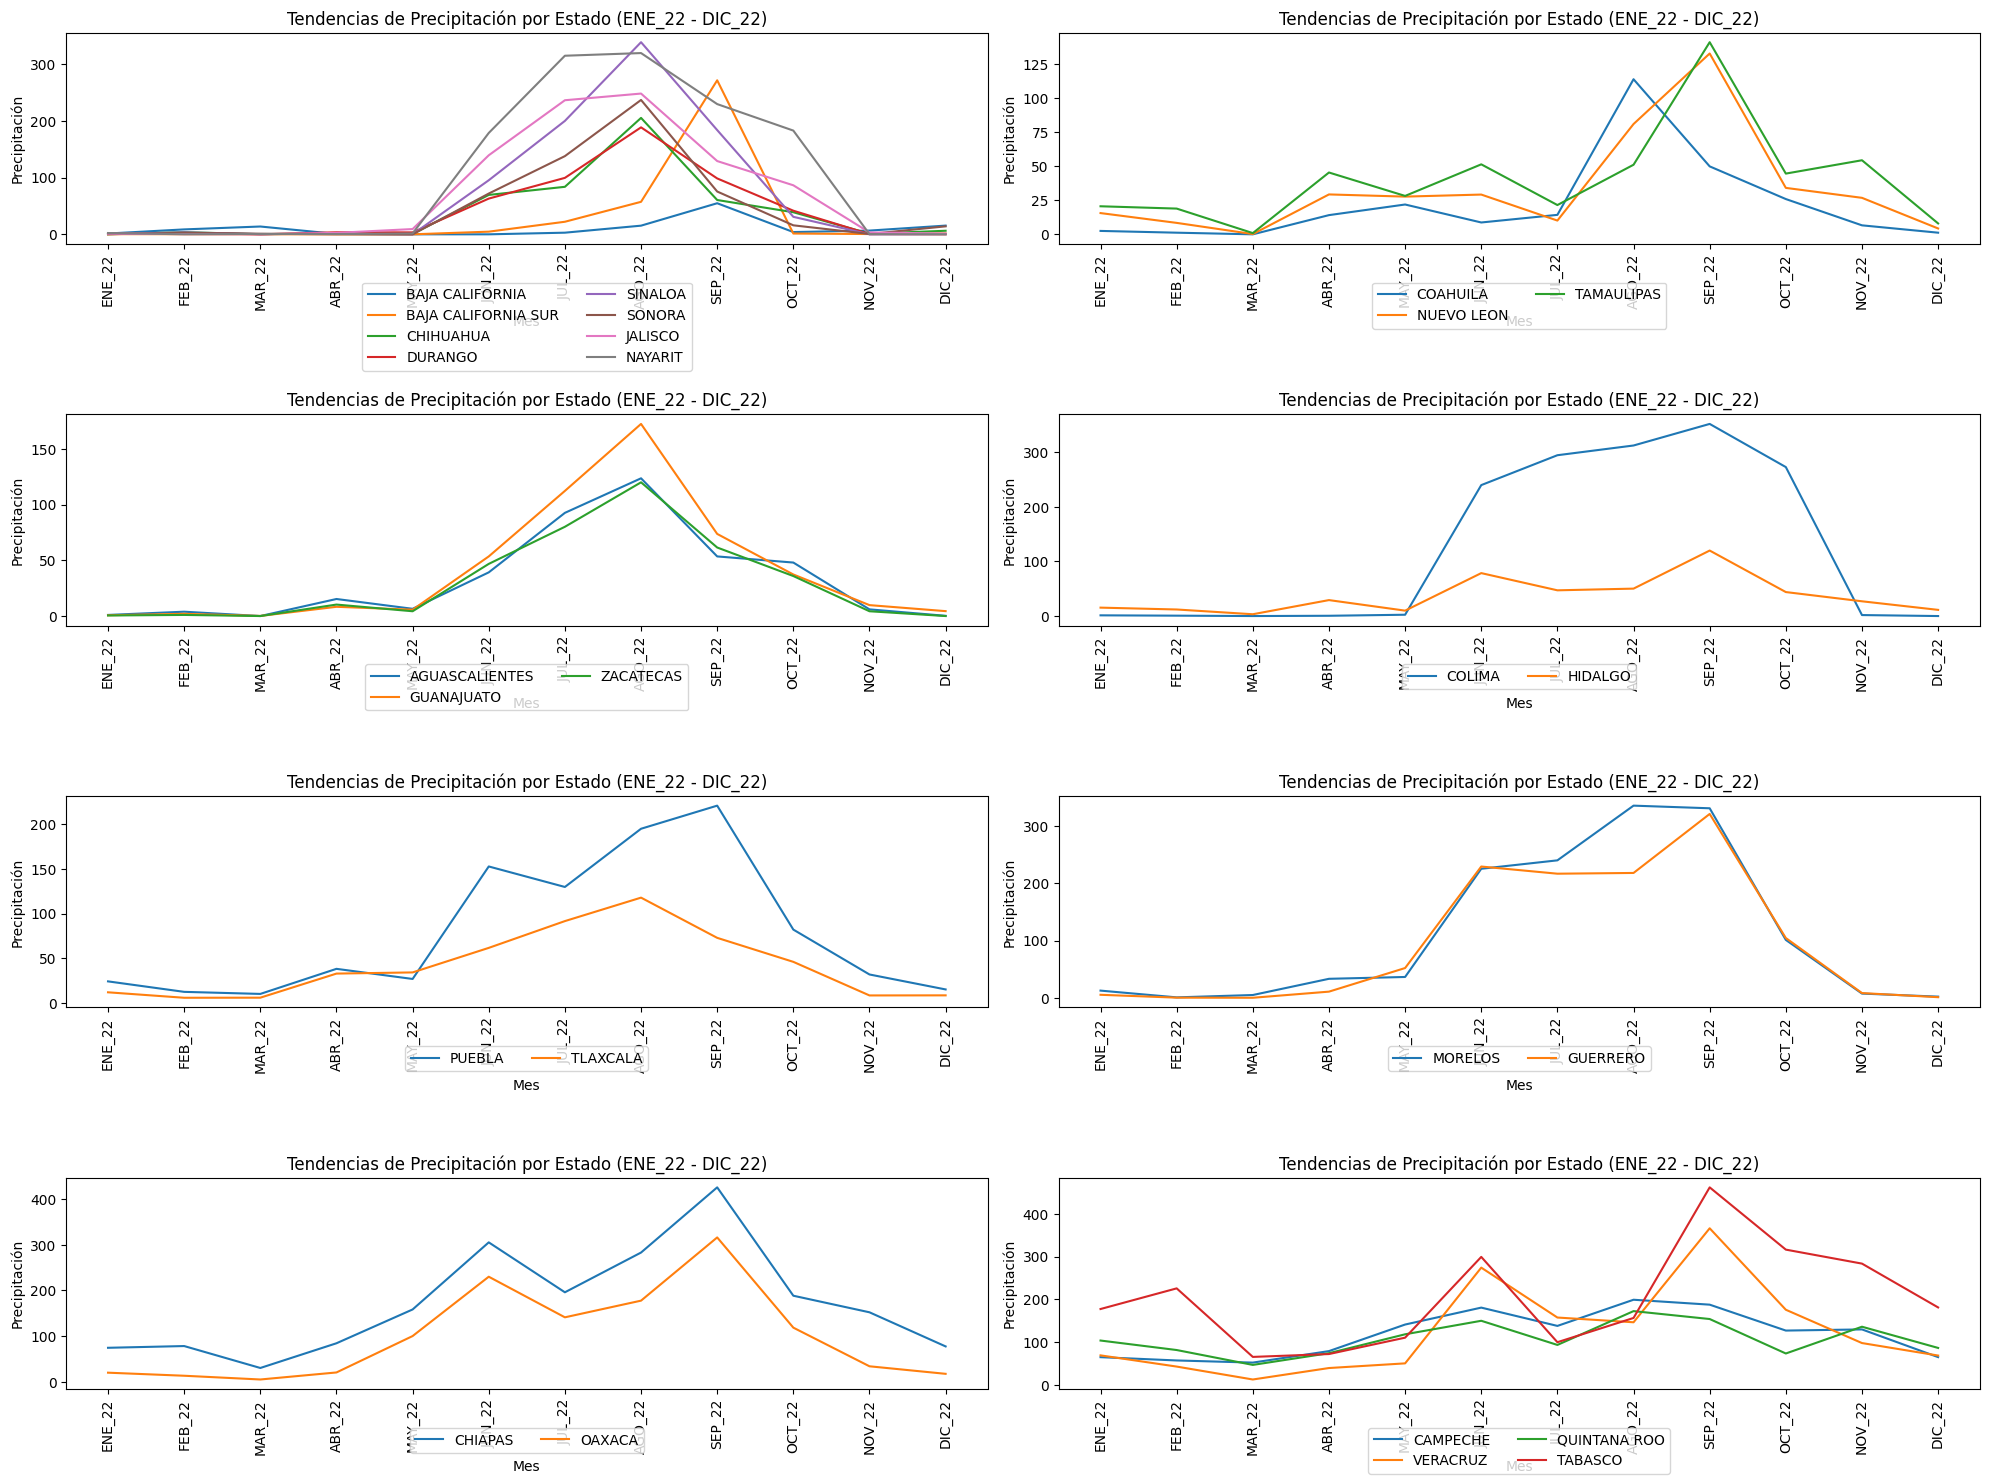

In [107]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_22", "FEB_22", "MAR_22", "ABR_22", "MAY_22", "JUN_22", "JUL_22", "AGO_22", "SEP_22", "OCT_22", "NOV_22", "DIC_22"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

In [110]:
# Selecciona las columnas de interés para el año anual
columns_to_plot = ["ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = anuales_precip.loc[anuales_precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación Anual por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Año")
    plt.ylabel("Precipitación Anual")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()
